# IV - dIdV Sweep Analysis Demo with 2 channels


The analysis of IV/dIdV sweep data is done in 2 steps:
1. <font color="blue"><b>Processing of the data</b> </font> which includes cutting pile-ups using "autocut", calculating offset, noise PSD (if IV/noise data available). 
  * Users can choose to process specific channels and to enable processing of IV/noise and/or dIdV data. 
  * By default, all available data for all channels are processed. 
  * Best is to process using <b>detprocess/scripts/process.py </b> rather than processing in a Jupyter notebook (see processing section). <br><br>
  
2. <font color="blue"><b>IV and/or dIdV analysis</b></font>: Analyze IV data to calculate TES resistance and bias power, fit dIdV if dIdV data available. This is done in a Jupyter notebook.  Multiple channels can be analyzed in the same time. 



We use data taken at UC Berkeley  using Spice/Herald <b>Melange 4% </b> and <b>Melange 1% </b> devices. Data are only stored locally. Change path to run notebook

In [2]:
import qetpy as qp
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import pickle

# detprocess
from detprocess import DIDVAnalysis, IVSweepAnalysis, IVSweepProcessing

## 1. IV Sweep processing


This step can be either done in a Jupyter Notebook or command line:

 * <font color="blue"><b>Jupyter Notebook:</b></font>
   * Instantiate IVSweepProcessing with data path
   * Call process" function. Default: all channels available processed, both IV and dIdV if available. Use arguments to disable either IV or dIdV or select specific channels. 
   
 * <font color="blue"><b>Command line </b></font> using <i><b>scripts/process.py</b></i> (<font color="red"><b>preferred</b></font>)
   * example: <i> python3 scripts/process.py --enable-ivsweep --raw_path /sdata1/runs/run28/raw/iv_didv_I2_D20230615_T231959 --ncores 16</i>

#### Processing using Jupyter Notebook directly

Let's save data in default location (same base directory as raw data + /processed/[group_name]/sweep_analysis_DYYYYMMDD_HHMMSS.hdf5). <br>
A different base path can be provided using "save_path" argument

In [3]:
base_path = '/sdata1/runs/run28'

#### Melange 4% processing
(in the notebook for demo but best is to launch processing using process.py script)

In [4]:
# Melange 4%
melange4pc_ivsweep_path = base_path + '/raw/iv_didv_I2_D20230621_T131907'
myproc = IVSweepProcessing(melange4pc_ivsweep_path)

dataframe_4pc = myproc.process(ncores=16, lgc_save=True)

INFO: Checking sweep data. Be patient!

IV/dIdV sweep available data:
 
Melange4pc1ch:
 -IV: 27 bias points
 -dIdV: 27 bias points
 -Common IV-dIdV: 27 bias points
INFO: Channel Melange4pc1ch IV and/or dIdV processing
INFO Node #2: processing bias point 159.985 uAINFO Node #1: processing bias point -133.378 uAINFO Node #4: processing bias point 89.982 uAINFO Node #5: processing bias point 69.958 uAINFO Node #7: processing bias point 44.968 uAINFO Node #3: processing bias point 120.018 uAINFO Node #9: processing bias point 28.037 uAINFO Node #8: processing bias point 35.037 uAINFO Node #6: processing bias point 54.98 uAINFO Node #11: processing bias point 19.979 uAINFO Node #12: processing bias point 9.966 uAINFO Node #15: processing bias point 2.478 uAINFO Node #14: processing bias point 5.001 uAINFO Node #10: processing bias point 23.967 uAINFO Node #13: processing bias point 7.524 uAINFO Node #16: processing bias point 0.036 uA















INFO Node #6: processing bias point 50.01

#### Melange 1% processing
(in the notebook for demo but best is to launch processing using process.py script)

In [5]:
# Melange 1%
melange1pc_ivsweep_path = base_path + '/raw/iv_didv_I2_D20230615_T231959'
myproc = IVSweepProcessing(melange1pc_ivsweep_path)

dataframe_1pc = myproc.process(ncores=16, lgc_save=True)

INFO: Checking sweep data. Be patient!

IV/dIdV sweep available data:
 
Melange1pc1ch:
 -IV: 28 bias points
 -dIdV: 28 bias points
 -Common IV-dIdV: 28 bias points
INFO: Channel Melange1pc1ch IV and/or dIdV processing
INFO Node #4: processing bias point 35.037 uAINFO Node #3: processing bias point 44.968 uAINFO Node #1: processing bias point 79.97 uAINFO Node #5: processing bias point 28.037 uAINFO Node #6: processing bias point 23.967 uAINFO Node #2: processing bias point 60.027 uAINFO Node #9: processing bias point 16.967 uAINFO Node #7: processing bias point 19.979 uAINFO Node #10: processing bias point 15.013 uAINFO Node #11: processing bias point 12.978 uAINFO Node #8: processing bias point 18.513 uAINFO Node #12: processing bias point 11.025 uAINFO Node #13: processing bias point 7.524 uAINFO Node #15: processing bias point 2.478 uAINFO Node #16: processing bias point 0.036 uAINFO Node #14: processing bias point 5.001 uA















INFO Node #11: processing bias point 12.001 

## 2. IV/dIdV Sweep Analysis

For the moment, the analysis needs to be done in a Jupyter Notebook. There are several steps:

Instantiate <b>IVSweepAnalysis</b>, then
1. <font color='red'><b>Set proceesed data:</b></font>
  * using file name (<i>set_data_from_file()</i> function), can be called mutliple times if multiple channels
  * or using dataframe directly (<i>set_data_from_dataframe()</i> function), can be called mutliple times if multiple channels
  * or using a dictionary with keys=channels and values=dataframes (<i>set_data_from_dataframe()</i> function)<br><br>
  
2. <font color='red'><b>Check data</b></font> Before analyzing the IV sweep data, it is best to have a look
  * Use <i>describe()</i> function to check what is available (channels, IV and/or dIdV points)
  * Plot raw offset in function of bias using "<i>plot_ivsweep_offset(channel)</i> function
  * During the proc
 
  
3. <font color='red'><b>Analyze IV sweep  to calculate I0, R0, P0 </b></font> (from IV and/or dIdV data) using "<i>analyze_sweep()"</i> function. <br><br>
    
4. <font color='red'><b>Analysze dIdV data</b></font>: Fit dIdV, calculate small signal parameters and uncertainties
   *  <b>Plot dIdV summary for a specific channel:</b> Make summary plots such as chi2, Loop gain, etc. using "<i>plot_didv_summary()</i>" function <br><br>
   
   
5. <font color='red'><b>Calculate energy resolution for each bias points</b></font> using <i>calc_energy_resolution()</i> function
   * Template is automatically calculate from small signal paramaters
   * Additionally, a template can be provided
   
   
6. <font color='red'><b>Noise Analysis/Simulation</b></font>: To be implemented
   

  

### Instantiate IV Analysis and set data (for multiple channels)

In [7]:
# instantiate Analysis
# let's automatically save analysis results in am hdf5 file
# a path (default: /path/to/run#/filterdata) or existing file can be provided
ivanalysis = IVSweepAnalysis(verbose=True, auto_save_hdf5=True)

# Melange 1%'
ivanalysis.set_data_from_file('/sdata1/runs/run28/filterdata/iv_didv_I2_D20230615_T231959/ivsweep_processing_D20240726_T140056.hdf5')

# Melange 4%=
ivanalysis.set_data_from_file('/sdata1/runs/run28/filterdata/iv_didv_I2_D20230621_T131907/ivsweep_processing_D20240726_T125254.hdf5')


INFO: Results will be automatically saved in ivsweep_analysis_D20240726_T140354.hdf5
INFO: Loading filter data from file /sdata1/runs/run28/filterdata/iv_didv_I2_D20230615_T231959/ivsweep_processing_D20240726_T140056.hdf5
INFO: Loading filter data from file /sdata1/runs/run28/filterdata/iv_didv_I2_D20230621_T131907/ivsweep_processing_D20240726_T125254.hdf5


### Check data

List of channels: ['Melange1pc1ch', 'Melange4pc1ch']

Channel Melange1pc1ch:
 * Tag "default":
    ivsweep_data: pandas.DataFrame  (28, 44)
       Nb SC points: 3
       Nb Normal points: 7

Channel Melange4pc1ch:
 * Tag "default":
    ivsweep_data: pandas.DataFrame  (27, 44)
       Nb SC points: 5
       Nb Normal points: 9


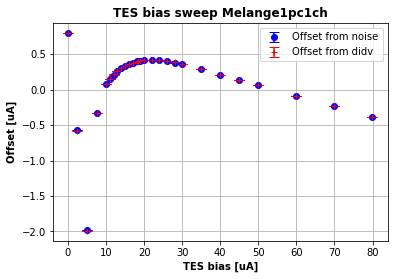

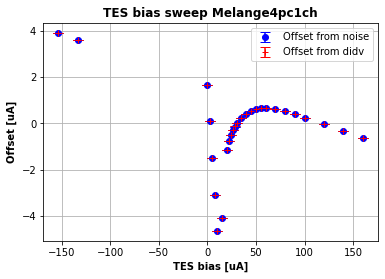

In [8]:
ivanalysis.describe()

# plot raw offset (no analysis)
ivanalysis.plot_ivsweep_offset(channel='Melange1pc1ch')
ivanalysis.plot_ivsweep_offset(channel='Melange4pc1ch')

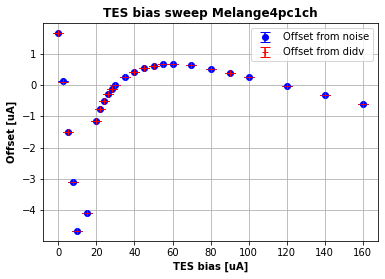

List of channels: ['Melange1pc1ch', 'Melange4pc1ch']

Channel Melange1pc1ch:
 * Tag "default":
    ivsweep_data: pandas.DataFrame  (28, 44)
       Nb SC points: 3
       Nb Normal points: 7

Channel Melange4pc1ch:
 * Tag "default":
    ivsweep_data: pandas.DataFrame  (25, 45)
       Nb SC points: 5
       Nb Normal points: 7


In [9]:
# The first two bias points for Melange 45 (with negative TES bias) were not properly set
# let's remove then

# let's get dataframe
ivdata = ivanalysis.get_ivsweep_data('Melange4pc1ch')


# cut the negative tes bias
cut = ivdata.tes_bias_uA>0
ivdata = ivdata[cut].reset_index()

# set data again
ivanalysis.set_data_from_dataframe('Melange4pc1ch', ivdata)

# check data
ivanalysis.plot_ivsweep_offset(channel='Melange4pc1ch')

ivanalysis.describe()

In [10]:
# we also need to modify the number of normal bias points for Melange 4%
ivanalysis.set_nb_sc_normal_points('Melange4pc1ch', nnorm=5)
ivanalysis.describe()

List of channels: ['Melange1pc1ch', 'Melange4pc1ch']

Channel Melange1pc1ch:
 * Tag "default":
    ivsweep_data: pandas.DataFrame  (28, 44)
       Nb SC points: 3
       Nb Normal points: 7

Channel Melange4pc1ch:
 * Tag "default":
    ivsweep_data: pandas.DataFrame  (25, 45)
       Nb SC points: 5
       Nb Normal points: 5


### Analyze sweep

INFO: Saving filter/TES data to file /sdata1/runs/run28/filterdata/iv_didv_I2_D20230615_T231959/ivsweep_analysis_D20240726_T140354.hdf5! (overwrite=True)


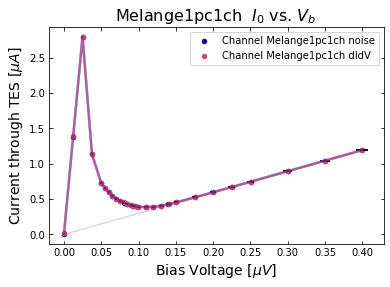

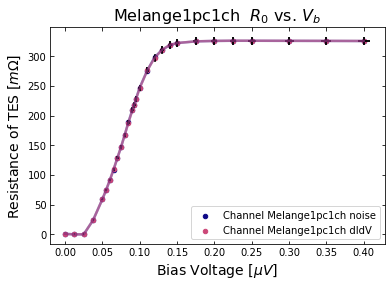

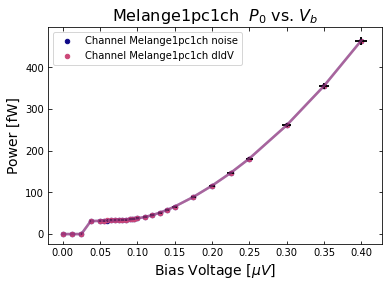

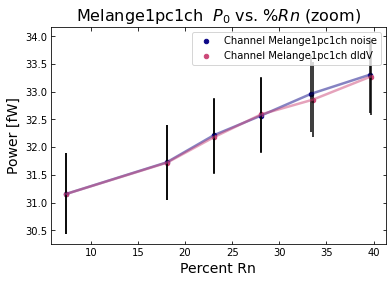

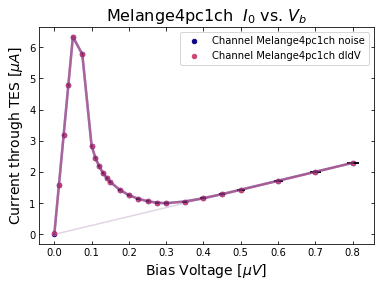

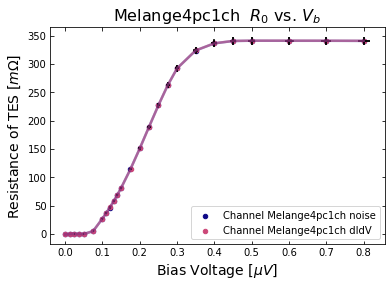

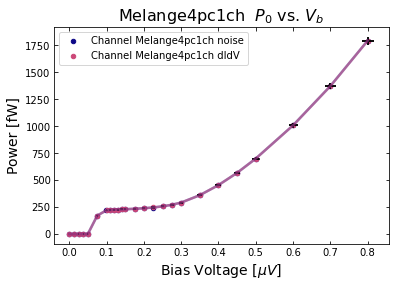

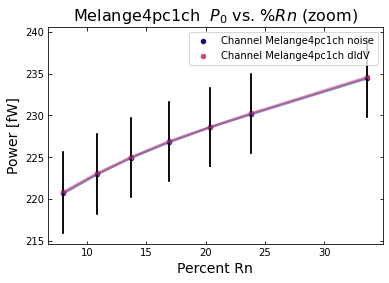

In [11]:
ivanalysis.analyze_sweep(lgc_plot=True, lgc_invert_offset='auto')

### Get IV sweep analysis results

In [12]:
result = ivanalysis.get_ivsweep_results('Melange1pc1ch')
result

{'rp': 0.003919024994864679,
 'rp_err': 7.838049989729357e-05,
 'rn': 0.32621300819553267,
 'rn_err': 0.006703098935646631,
 'rshunt': 0.004999999888241291,
 'rshunt_err': 9.999999776482583e-05,
 'rsh': 0.004999999888241291,
 'rsh_err': 9.999999776482583e-05,
 'i0_off': -8.089905050552639e-07,
 'i0_off_err': 1.9736996071356912e-11,
 'ibias_off': 1.4305333723784196e-08,
 'ibias_off_err': 3.9430034832447756e-11,
 'lgc_invert_offset': True,
 'close_loop_norm': 625000.0,
 'output_variable_offset': -0.07203907519578934,
 'output_variable_gain': 50.0,
 'group_name_sweep': 'iv_didv_I2_D20230615_T231959',
 'i0_variable_offset': -5.763126015663147e-06}

### Analyze didV data 


Melange1pc1ch SC dIdV analysis
INFO: Calculating small signal parameters for 1-pole model!


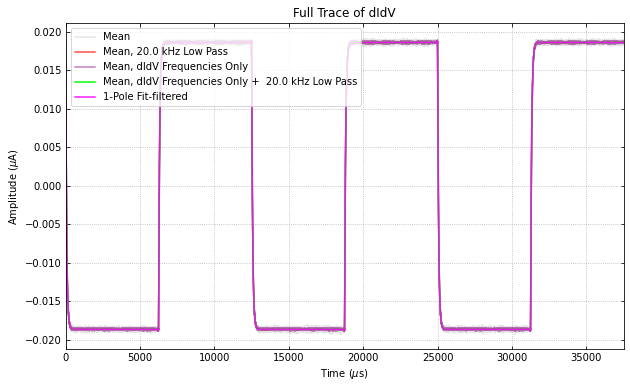

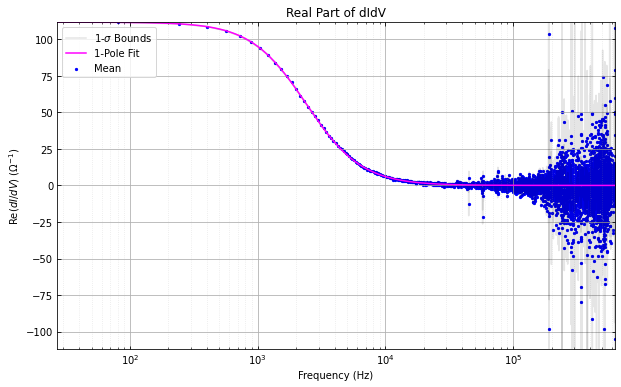

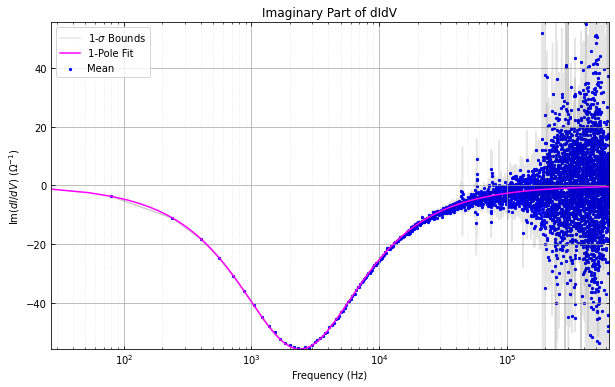

INFO: Calculating small signal parameters for 1-pole model!
Melange1pc1ch Rp from dIdV fit = 3.96 +/- 0.008 mOhms
Melange1pc1ch Rp from IV Sweep = 3.92 +/- 0.078 mOhms

Melange4pc1ch SC dIdV analysis
INFO: Calculating small signal parameters for 1-pole model!


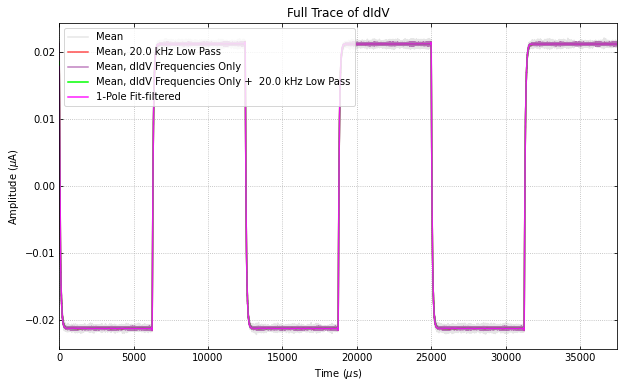

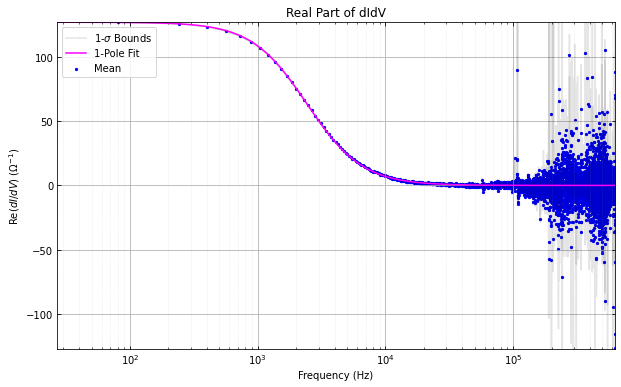

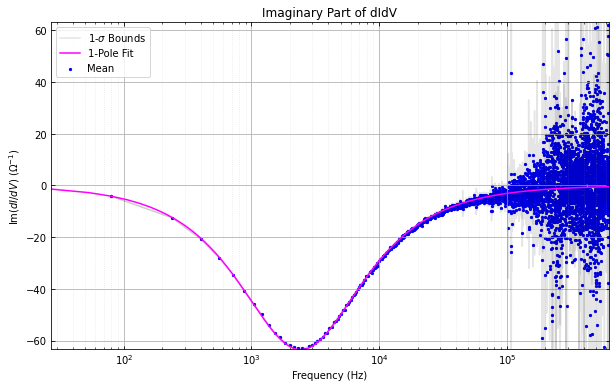

INFO: Calculating small signal parameters for 1-pole model!
INFO: Calculating small signal parameters for 1-pole model!
INFO: Calculating small signal parameters for 1-pole model!
Melange4pc1ch Rp from dIdV fit = 2.88 +/- 0.007 mOhms
Melange4pc1ch Rp from IV Sweep = 2.87 +/- 0.057 mOhms
INFO: Saving filter/TES data to file /sdata1/runs/run28/filterdata/iv_didv_I2_D20230615_T231959/ivsweep_analysis_D20240726_T140354.hdf5! (overwrite=True)

Melange1pc1ch Normal dIdV analysis
INFO: Calculating small signal parameters for 1-pole model!


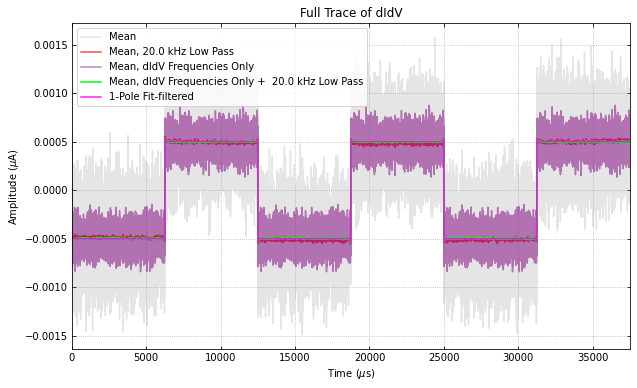

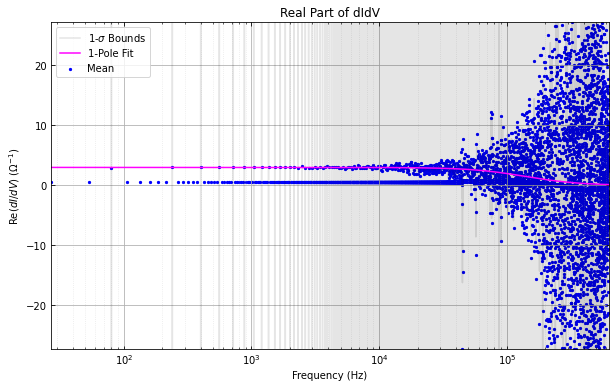

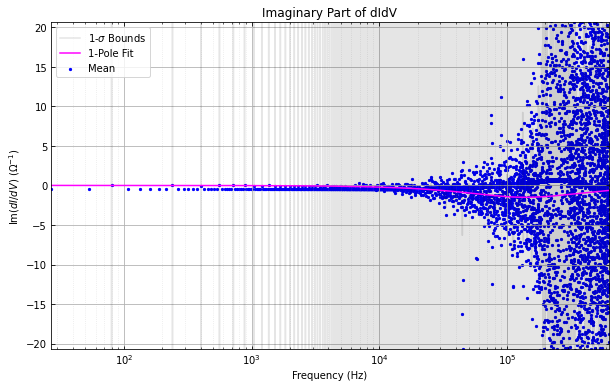

INFO: Calculating small signal parameters for 1-pole model!
INFO: Calculating small signal parameters for 1-pole model!
INFO: Calculating small signal parameters for 1-pole model!
Melange1pc1ch Rn from dIdV fit = 323.63 +/- 1.100 mOhms
Melange1pc1ch Rn from IV Sweep = 326.21 +/- 6.703 mOhms

Melange4pc1ch Normal dIdV analysis
INFO: Calculating small signal parameters for 1-pole model!


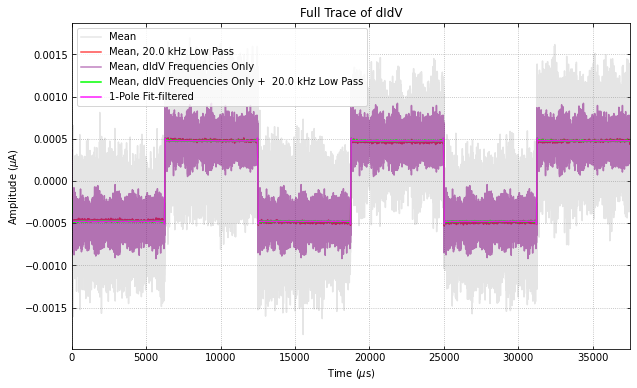

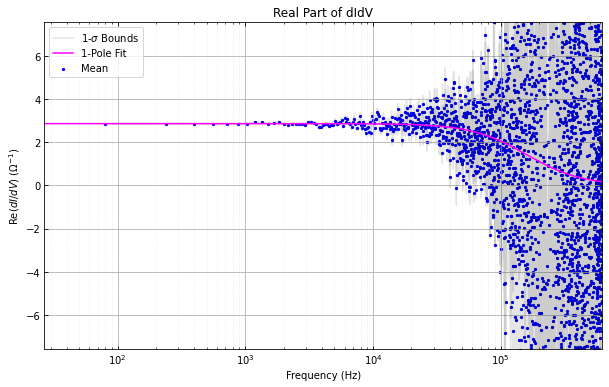

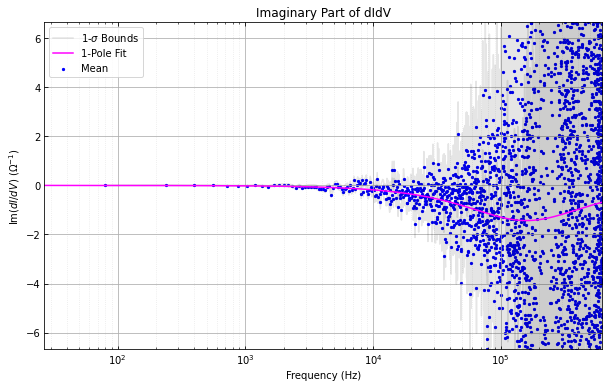

INFO: Calculating small signal parameters for 1-pole model!
INFO: Calculating small signal parameters for 1-pole model!
INFO: Calculating small signal parameters for 1-pole model!
Melange4pc1ch Rn from dIdV fit = 340.25 +/- 1.400 mOhms
Melange4pc1ch Rn from IV Sweep = 340.86 +/- 6.975 mOhms
INFO: Saving filter/TES data to file /sdata1/runs/run28/filterdata/iv_didv_I2_D20230615_T231959/ivsweep_analysis_D20240726_T140354.hdf5! (overwrite=True)

Melange1pc1ch Transition dIdV analysis


Melange1pc1ch TES bias 18.513 uA, R0 = 217.93 mOhms (% Rn = 66.80)

INFO: Fitting dIdV (2 and 3-poles)
INFO: Calculating small signal parameters for 2-poles model 
INFO: Calculating small signal parameters for 3-poles model 
INFO: Calculating dPdI (2 and 3-poles)

Results from 2-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.170

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000386 s
Tau2: 1.66e-06 s
Tau3: 0 s

True dIdV Poles (from 2-poles fit): 
Tau_plus: 1.68e-06 s
Tau_minus: 0.000198

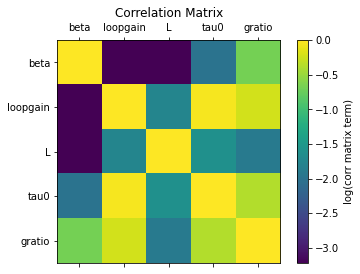

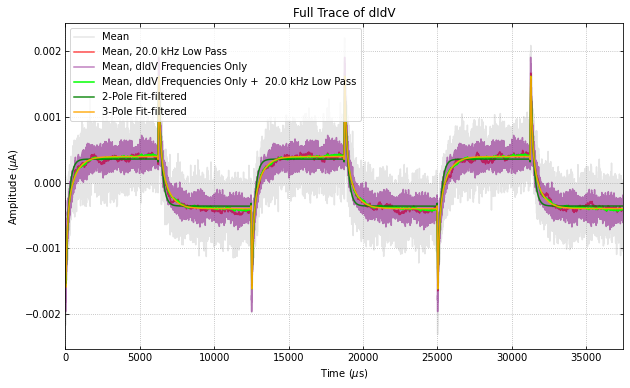

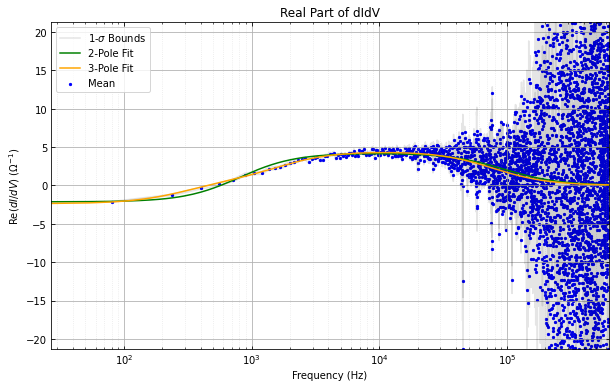

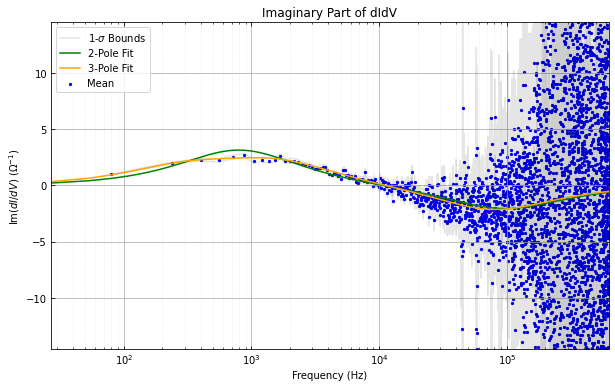



Melange1pc1ch TES bias 18.025 uA, R0 = 210.21 mOhms (% Rn = 64.40)

INFO: Fitting dIdV (2 and 3-poles)
INFO: Calculating small signal parameters for 2-poles model 
INFO: Calculating small signal parameters for 3-poles model 
INFO: Calculating dPdI (2 and 3-poles)

Results from 2-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.174

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000319 s
Tau2: 1.83e-06 s
Tau3: 0 s

True dIdV Poles (from 2-poles fit): 
Tau_plus: 1.86e-06 s
Tau_minus: 0.000179 s
Tau_third: 0 s

Small Signal Parameters:
l (loop gain) = 3.105 +/- 0.0749
beta = 0.061 +/- 0.0222
gratio = -0.000 +/- 0.0000
tau0 = 0.671 +/- 0.02311 ms
L = 424.783 +/- 14.8554 nH

Results from 3-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.165

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000734 s
Tau2: 2.22e-06 s
Tau3: 0.0003152 s

True dIdV Poles (from 3-poles fit): 
Tau_plus: 2.28e-06 s
Tau_minus: 8.92e-05 s
Tau_third: 0.0004933 s

Small Signal Paramet

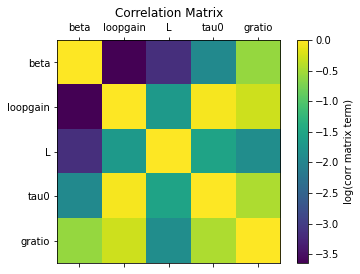

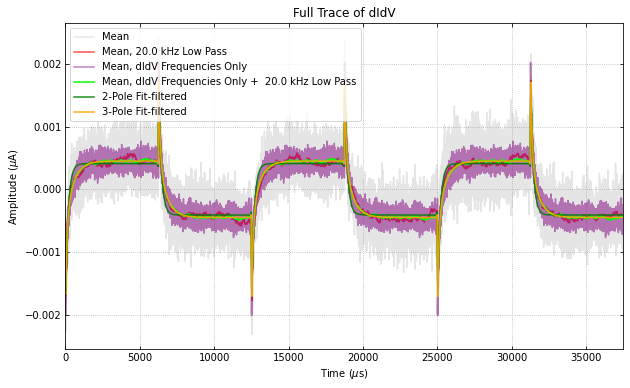

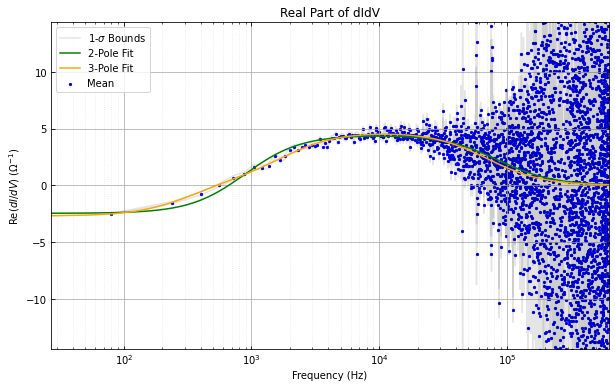

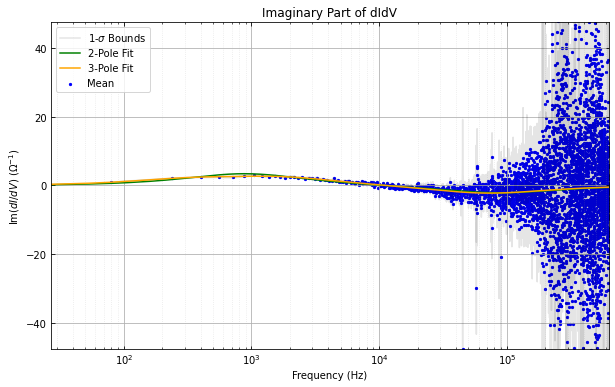



Melange1pc1ch TES bias 16.967 uA, R0 = 189.09 mOhms (% Rn = 58.00)

INFO: Fitting dIdV (2 and 3-poles)
INFO: Calculating small signal parameters for 2-poles model 
INFO: Calculating small signal parameters for 3-poles model 
INFO: Calculating dPdI (2 and 3-poles)

Results from 2-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.171

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000244 s
Tau2: 2.04e-06 s
Tau3: 0 s

True dIdV Poles (from 2-poles fit): 
Tau_plus: 2.08e-06 s
Tau_minus: 0.000168 s
Tau_third: 0 s

Small Signal Parameters:
l (loop gain) = 4.203 +/- 0.1486
beta = 0.081 +/- 0.0228
gratio = -0.000 +/- 0.0000
tau0 = 0.782 +/- 0.03558 ms
L = 434.208 +/- 14.5829 nH

Results from 3-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.166

Fit time constants, NOT dIdV Poles: 
Tau1: 0.00033 s
Tau2: 2.32e-06 s
Tau3: 0.0004094 s

True dIdV Poles (from 3-poles fit): 
Tau_plus: 2.39e-06 s
Tau_minus: 0.000104 s
Tau_third: 0.0005695 s

Small Signal Paramete

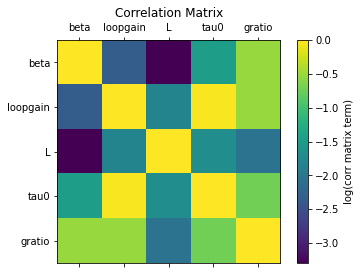

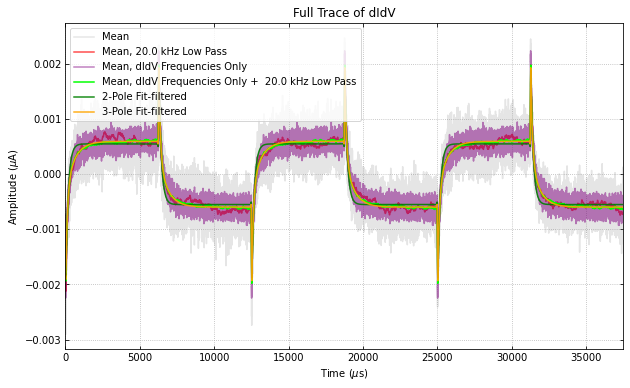

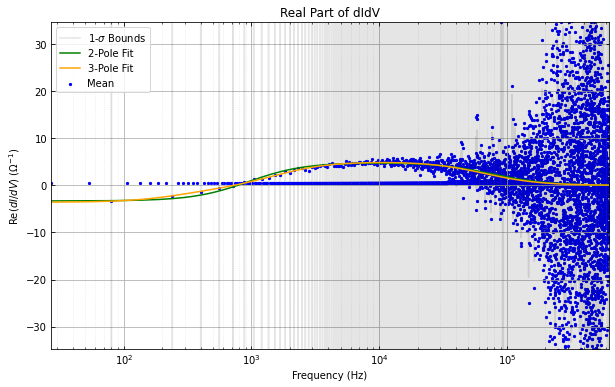

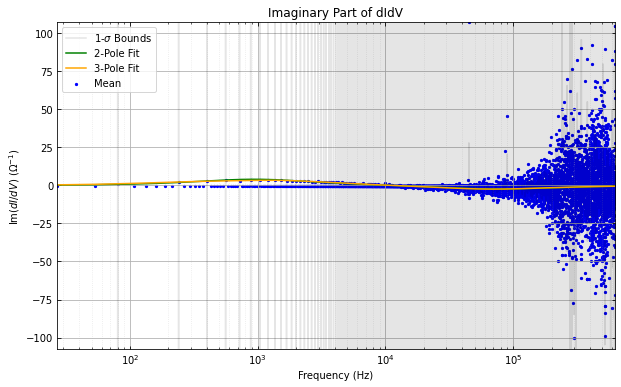



Melange1pc1ch TES bias 15.990 uA, R0 = 167.93 mOhms (% Rn = 51.50)

INFO: Fitting dIdV (2 and 3-poles)
INFO: Calculating small signal parameters for 2-poles model 
INFO: Calculating small signal parameters for 3-poles model 
INFO: Calculating dPdI (2 and 3-poles)

Results from 2-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.171

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000217 s
Tau2: 2.34e-06 s
Tau3: 0 s

True dIdV Poles (from 2-poles fit): 
Tau_plus: 2.4e-06 s
Tau_minus: 0.000168 s
Tau_third: 0 s

Small Signal Parameters:
l (loop gain) = 5.175 +/- 0.2255
beta = 0.096 +/- 0.0230
gratio = -0.000 +/- 0.0000
tau0 = 0.908 +/- 0.04853 ms
L = 451.510 +/- 10.9977 nH

Results from 3-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.164

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000315 s
Tau2: 2.69e-06 s
Tau3: 0.0002725 s

True dIdV Poles (from 3-poles fit): 
Tau_plus: 2.79e-06 s
Tau_minus: 9.05e-05 s
Tau_third: 0.0004176 s

Small Signal Paramete

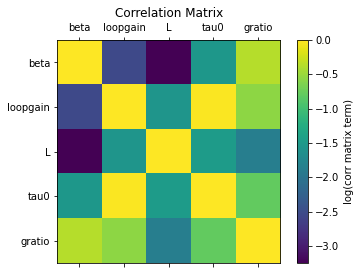

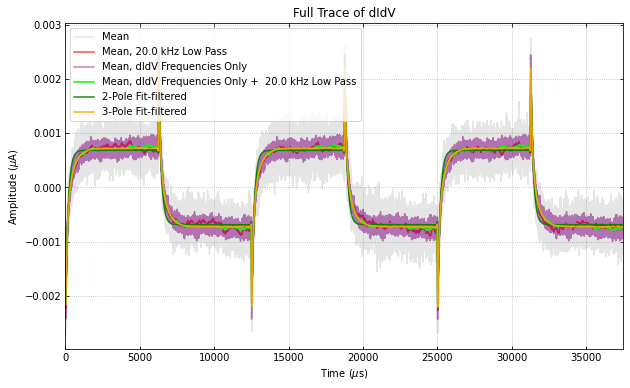

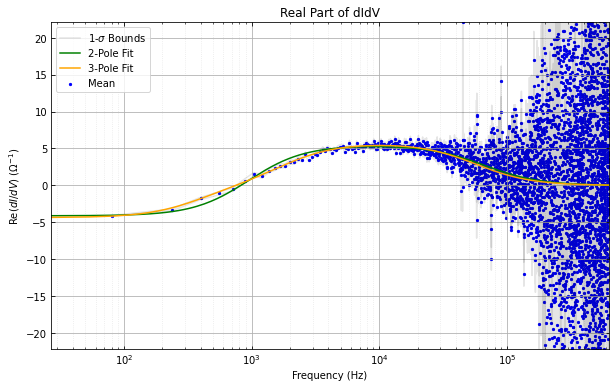

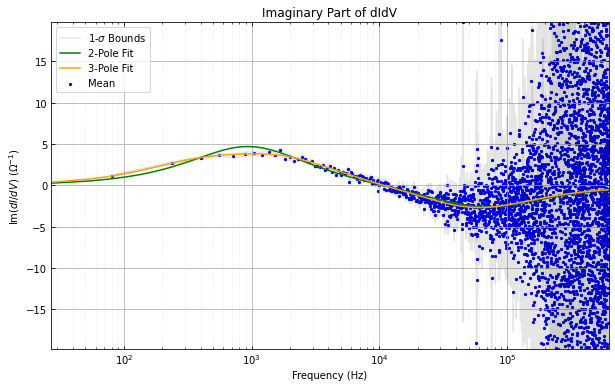



Melange1pc1ch TES bias 15.013 uA, R0 = 147.56 mOhms (% Rn = 45.20)

INFO: Fitting dIdV (2 and 3-poles)
INFO: Calculating small signal parameters for 2-poles model 
INFO: Calculating small signal parameters for 3-poles model 
INFO: Calculating dPdI (2 and 3-poles)

Results from 2-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.173

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000188 s
Tau2: 2.52e-06 s
Tau3: 0 s

True dIdV Poles (from 2-poles fit): 
Tau_plus: 2.59e-06 s
Tau_minus: 0.000166 s
Tau_third: 0 s

Small Signal Parameters:
l (loop gain) = 6.579 +/- 0.3752
beta = 0.145 +/- 0.0242
gratio = -0.000 +/- 0.0000
tau0 = 1.05 +/- 0.06987 ms
L = 447.555 +/- 11.2375 nH

Results from 3-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.168

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000281 s
Tau2: 2.98e-06 s
Tau3: 0.0002006 s

True dIdV Poles (from 3-poles fit): 
Tau_plus: 3.12e-06 s
Tau_minus: 7.84e-05 s
Tau_third: 0.0003391 s

Small Signal Paramete

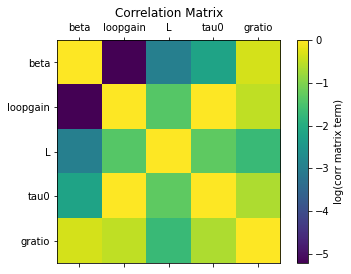

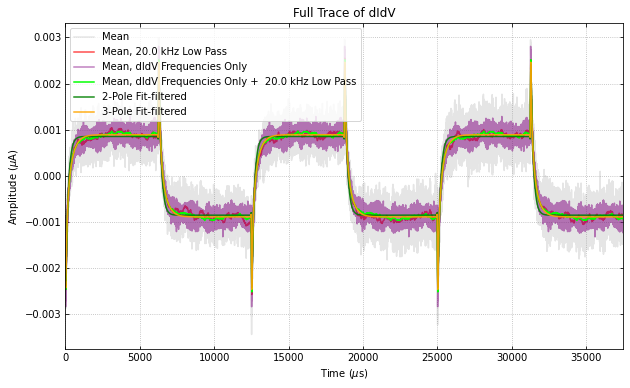

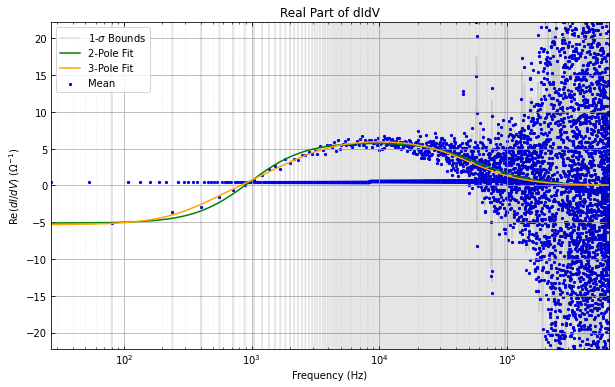

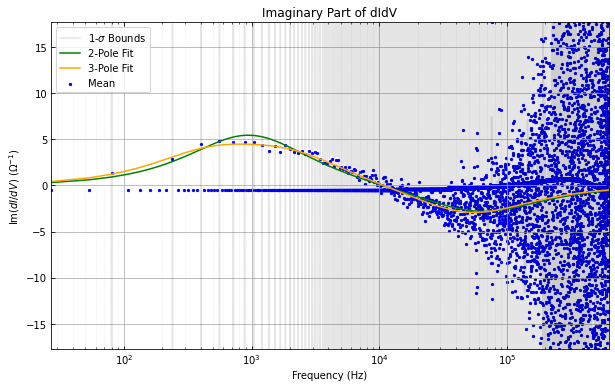



Melange1pc1ch TES bias 14.036 uA, R0 = 129.13 mOhms (% Rn = 39.60)

INFO: Fitting dIdV (2 and 3-poles)
INFO: Calculating small signal parameters for 2-poles model 
INFO: Calculating small signal parameters for 3-poles model 
INFO: Calculating dPdI (2 and 3-poles)

Results from 2-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.171

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000172 s
Tau2: 2.92e-06 s
Tau3: 0 s

True dIdV Poles (from 2-poles fit): 
Tau_plus: 3.02e-06 s
Tau_minus: 0.000163 s
Tau_third: 0 s

Small Signal Parameters:
l (loop gain) = 7.807 +/- 0.5307
beta = 0.157 +/- 0.0244
gratio = -0.000 +/- 0.0000
tau0 = 1.17 +/- 0.09086 ms
L = 461.704 +/- 8.9265 nH

Results from 3-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.165

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000242 s
Tau2: 3.36e-06 s
Tau3: 0.000191 s

True dIdV Poles (from 3-poles fit): 
Tau_plus: 3.54e-06 s
Tau_minus: 7.81e-05 s
Tau_third: 0.0003229 s

Small Signal Parameters

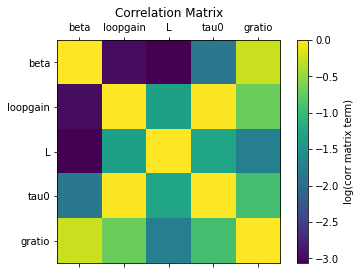

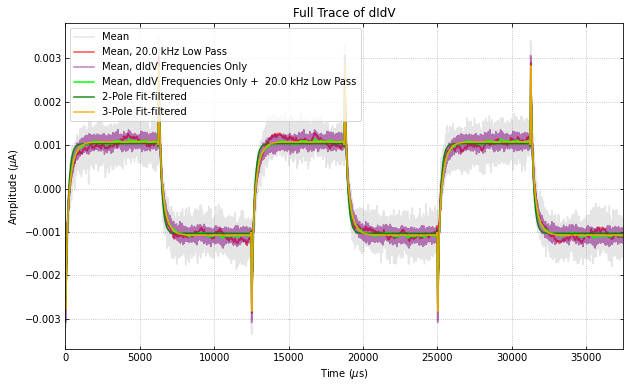

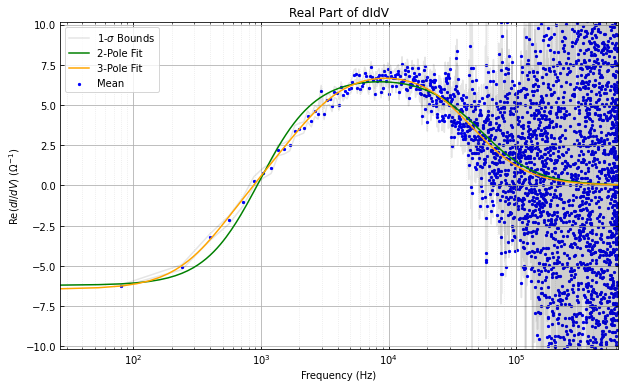

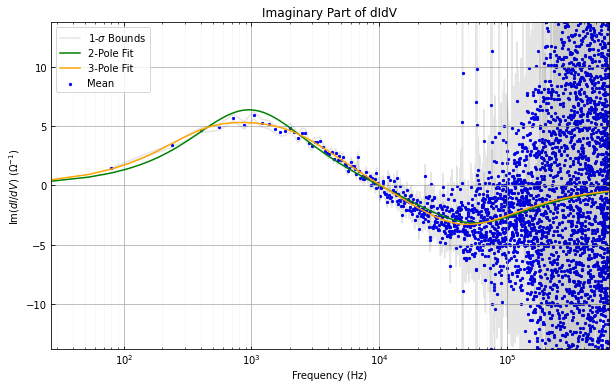



Melange1pc1ch TES bias 12.978 uA, R0 = 108.89 mOhms (% Rn = 33.40)

INFO: Fitting dIdV (2 and 3-poles)
INFO: Calculating small signal parameters for 2-poles model 
INFO: Calculating small signal parameters for 3-poles model 
INFO: Calculating dPdI (2 and 3-poles)

Results from 2-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.170

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000151 s
Tau2: 3.73e-06 s
Tau3: 0 s

True dIdV Poles (from 2-poles fit): 
Tau_plus: 3.92e-06 s
Tau_minus: 0.000156 s
Tau_third: 0 s

Small Signal Parameters:
l (loop gain) = 9.596 +/- 0.8189
beta = 0.191 +/- 0.0256
gratio = -0.000 +/- 0.0000
tau0 = 1.3 +/- 0.1233 ms
L = 517.175 +/- 9.8220 nH

Results from 3-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.164

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000183 s
Tau2: 4.19e-06 s
Tau3: 0.0002669 s

True dIdV Poles (from 3-poles fit): 
Tau_plus: 4.49e-06 s
Tau_minus: 8.76e-05 s
Tau_third: 0.000399 s

Small Signal Parameters:


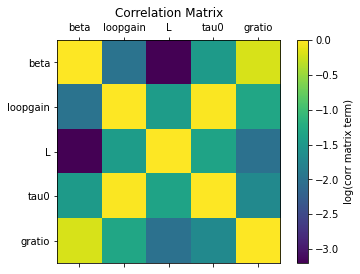

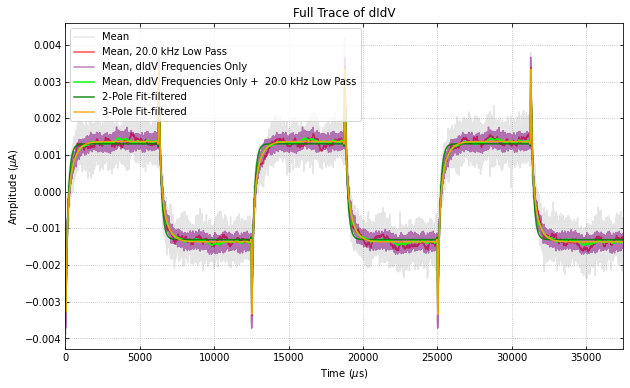

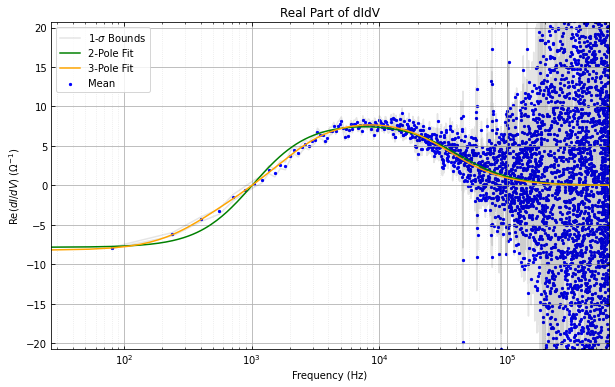

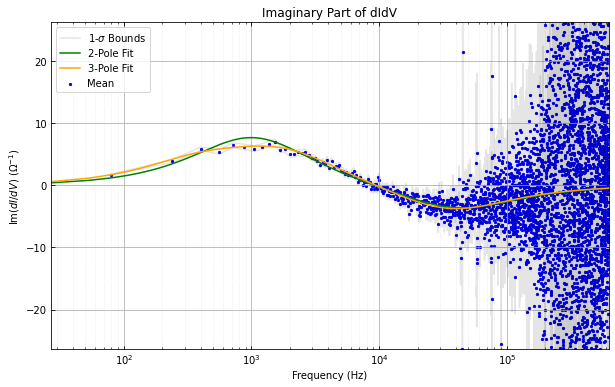



Melange1pc1ch TES bias 12.001 uA, R0 = 91.58 mOhms (% Rn = 28.10)

INFO: Fitting dIdV (2 and 3-poles)
INFO: Calculating small signal parameters for 2-poles model 
INFO: Calculating small signal parameters for 3-poles model 
INFO: Calculating dPdI (2 and 3-poles)

Results from 2-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.169

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000137 s
Tau2: 3.85e-06 s
Tau3: 0 s

True dIdV Poles (from 2-poles fit): 
Tau_plus: 4.06e-06 s
Tau_minus: 0.00016 s
Tau_third: 0 s

Small Signal Parameters:
l (loop gain) = 12.240 +/- 1.3073
beta = 0.262 +/- 0.0271
gratio = -0.000 +/- 0.0000
tau0 = 1.54 +/- 0.1785 ms
L = 478.974 +/- 7.6339 nH

Results from 3-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.162

Fit time constants, NOT dIdV Poles: 
Tau1: 0.00017 s
Tau2: 4.4e-06 s
Tau3: 0.0002015 s

True dIdV Poles (from 3-poles fit): 
Tau_plus: 4.75e-06 s
Tau_minus: 7.74e-05 s
Tau_third: 0.000335 s

Small Signal Parameters:
l 

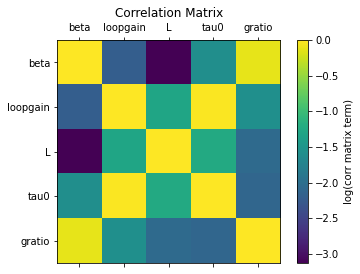

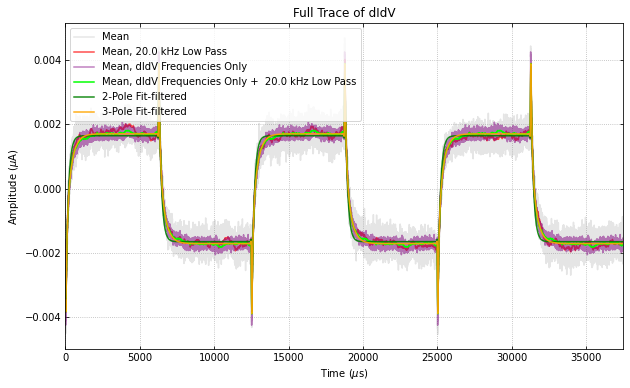

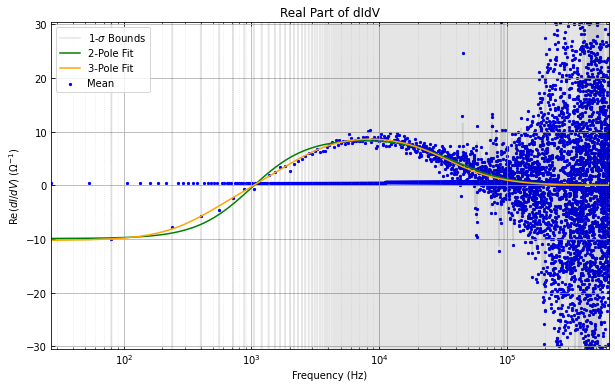

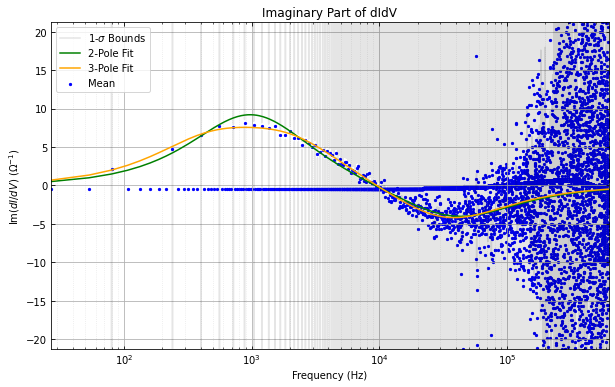



Melange1pc1ch TES bias 11.025 uA, R0 = 75.18 mOhms (% Rn = 23.00)

INFO: Fitting dIdV (2 and 3-poles)
INFO: Calculating small signal parameters for 2-poles model 
INFO: Calculating small signal parameters for 3-poles model 
INFO: Calculating dPdI (2 and 3-poles)

Results from 2-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.174

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000117 s
Tau2: 4.5e-06 s
Tau3: 0 s

True dIdV Poles (from 2-poles fit): 
Tau_plus: 4.83e-06 s
Tau_minus: 0.000149 s
Tau_third: 0 s

Small Signal Parameters:
l (loop gain) = 13.846 +/- 1.6348
beta = 0.342 +/- 0.0291
gratio = -0.000 +/- 0.0000
tau0 = 1.5 +/- 0.1904 ms
L = 494.143 +/- 6.5601 nH

Results from 3-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.168

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000135 s
Tau2: 5.07e-06 s
Tau3: 0.0001999 s

True dIdV Poles (from 3-poles fit): 
Tau_plus: 5.6e-06 s
Tau_minus: 7.76e-05 s
Tau_third: 0.0003177 s

Small Signal Parameters:
l

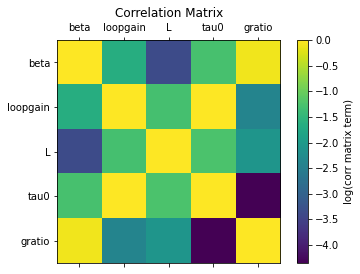

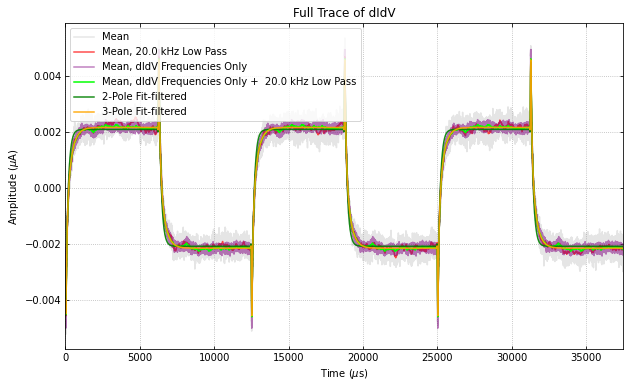

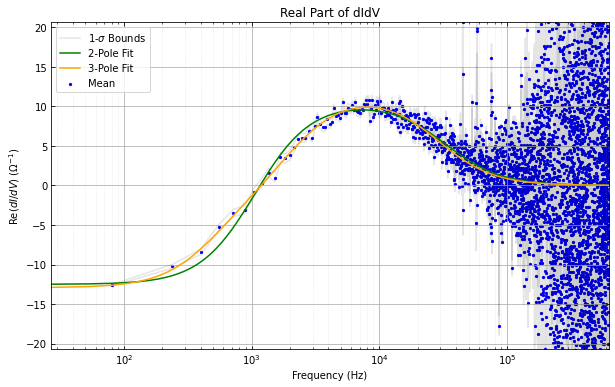

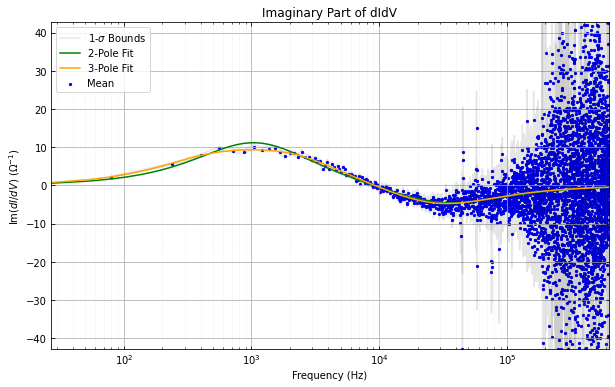



Melange1pc1ch TES bias 9.966 uA, R0 = 58.86 mOhms (% Rn = 18.00)

INFO: Fitting dIdV (2 and 3-poles)
INFO: Calculating small signal parameters for 2-poles model 
INFO: Calculating small signal parameters for 3-poles model 
INFO: Calculating dPdI (2 and 3-poles)

Results from 2-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.173

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000103 s
Tau2: 5.64e-06 s
Tau3: 0 s

True dIdV Poles (from 2-poles fit): 
Tau_plus: 6.22e-06 s
Tau_minus: 0.000148 s
Tau_third: 0 s

Small Signal Parameters:
l (loop gain) = 18.068 +/- 2.7668
beta = 0.419 +/- 0.0312
gratio = -0.000 +/- 0.0000
tau0 = 1.76 +/- 0.2849 ms
L = 521.726 +/- 5.7458 nH

Results from 3-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.165

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000113 s
Tau2: 6.3e-06 s
Tau3: 0.0002444 s

True dIdV Poles (from 3-poles fit): 
Tau_plus: 7.19e-06 s
Tau_minus: 8.26e-05 s
Tau_third: 0.0003658 s

Small Signal Parameters:


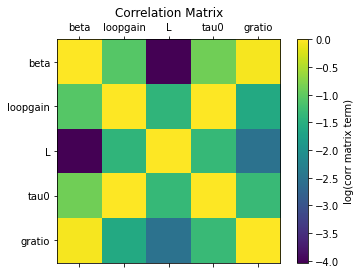

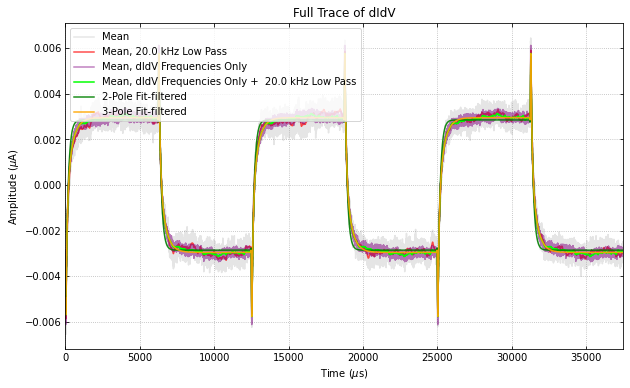

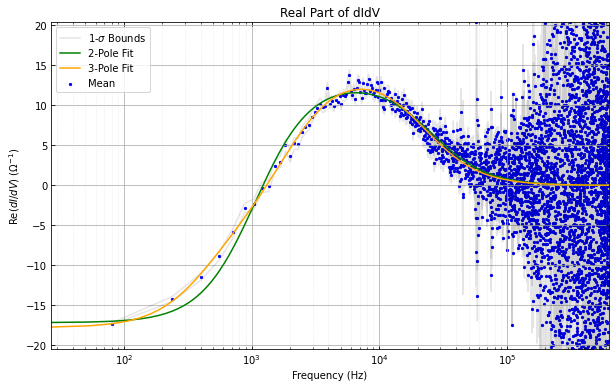

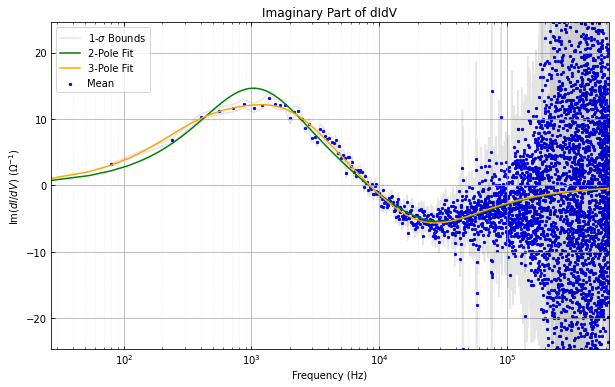



Melange1pc1ch TES bias 7.524 uA, R0 = 24.12 mOhms (% Rn = 7.40)

INFO: Fitting dIdV (2 and 3-poles)
INFO: Calculating small signal parameters for 2-poles model 
INFO: Calculating small signal parameters for 3-poles model 
INFO: Calculating dPdI (2 and 3-poles)

Results from 2-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.173

Fit time constants, NOT dIdV Poles: 
Tau1: 6.35e-05 s
Tau2: 9.96e-06 s
Tau3: 0 s

True dIdV Poles (from 2-poles fit): 
Tau_plus: 1.28e-05 s
Tau_minus: 0.000157 s
Tau_third: 0 s

Small Signal Parameters:
l (loop gain) = 40.446 +/- 13.1496
beta = 0.860 +/- 0.0454
gratio = -0.000 +/- 0.0000
tau0 = 2.5 +/- 0.8344 ms
L = 535.572 +/- 4.1202 nH

Results from 3-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.167

Fit time constants, NOT dIdV Poles: 
Tau1: 6.4e-05 s
Tau2: 1.08e-05 s
Tau3: 0.000228 s

True dIdV Poles (from 3-poles fit): 
Tau_plus: 1.49e-05 s
Tau_minus: 8.94e-05 s
Tau_third: 0.0003377 s

Small Signal Parameters:
l 

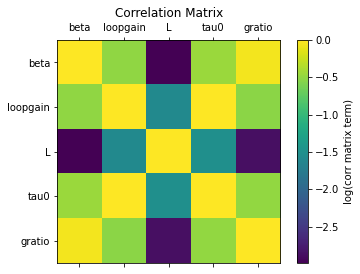

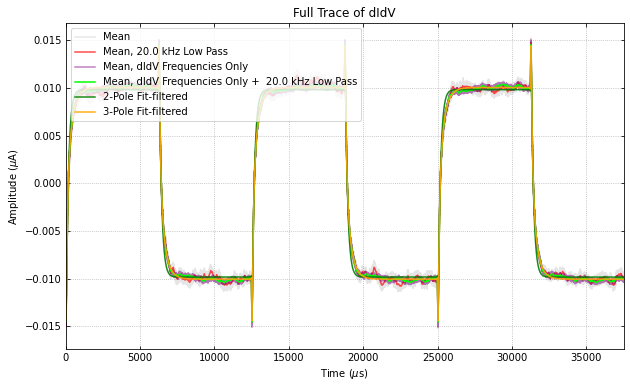

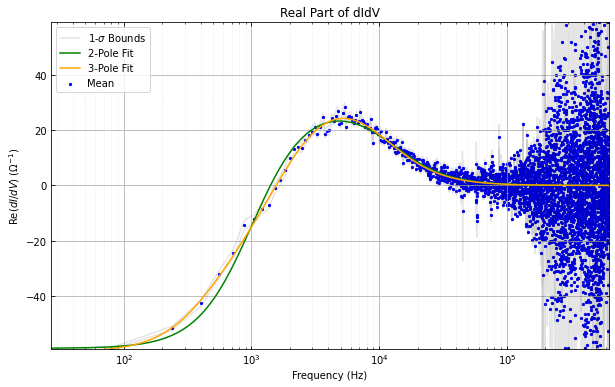

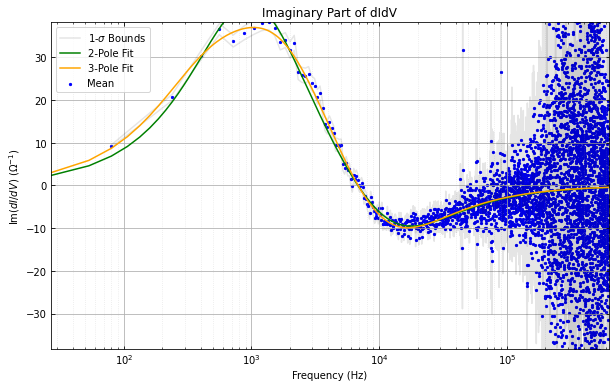


Melange4pc1ch Transition dIdV analysis


Melange4pc1ch TES bias 50.015 uA, R0 = 227.27 mOhms (% Rn = 66.70)

INFO: Fitting dIdV (2 and 3-poles)
INFO: Calculating small signal parameters for 2-poles model 
INFO: Calculating small signal parameters for 3-poles model 
INFO: Calculating dPdI (2 and 3-poles)

Results from 2-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.189

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000167 s
Tau2: 5.19e-07 s
Tau3: 0 s

True dIdV Poles (from 2-poles fit): 
Tau_plus: 5.23e-07 s
Tau_minus: 0.000108 s
Tau_third: 0 s

Small Signal Parameters:
l (loop gain) = 3.268 +/- 0.0703
beta = 0.233 +/- 0.0257
gratio = -0.000 +/- 0.0000
tau0 = 0.379 +/- 0.01171 ms
L = 149.390 +/- 13.7160 nH

Results from 3-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.176

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000281 s
Tau2: 1.51e-06 s
Tau3: 0.0002033 s

True dIdV Poles (from 3-poles fit): 
Tau_plus: 1.55e-06 s
Tau_minus: 5.8e-05 s
Tau_t

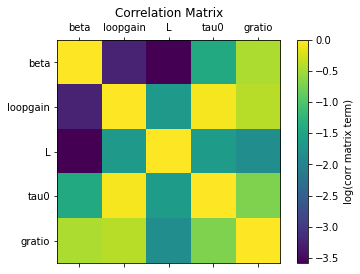

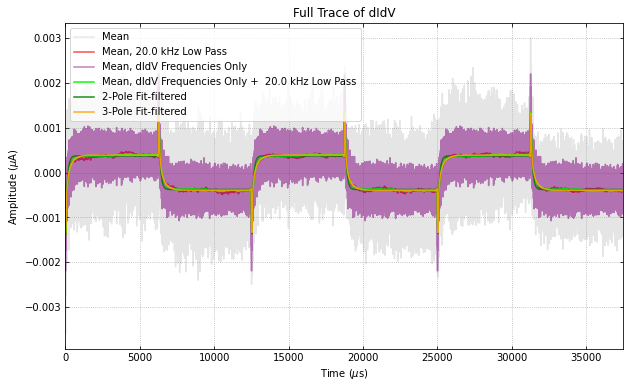

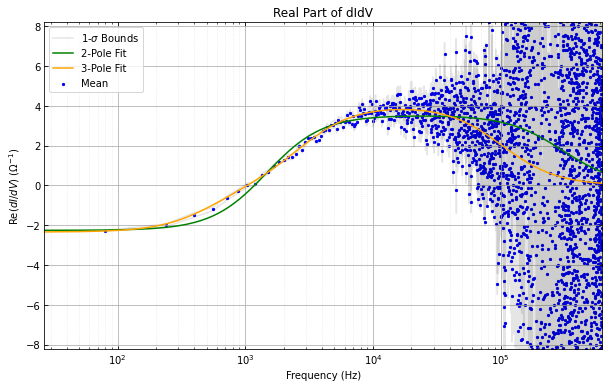

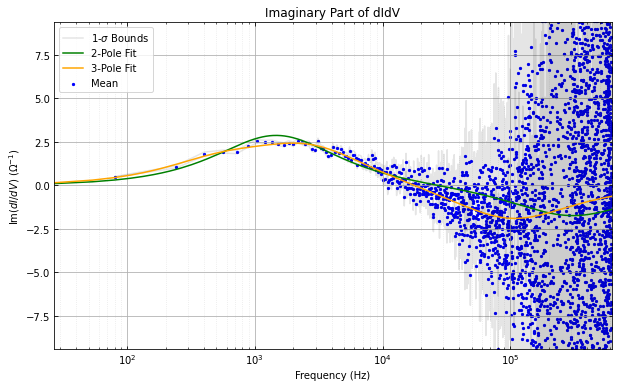



Melange4pc1ch TES bias 44.968 uA, R0 = 189.13 mOhms (% Rn = 55.50)

INFO: Fitting dIdV (2 and 3-poles)
INFO: Calculating small signal parameters for 2-poles model 
INFO: Calculating small signal parameters for 3-poles model 
INFO: Calculating dPdI (2 and 3-poles)

Results from 2-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.181

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000108 s
Tau2: 1.04e-06 s
Tau3: 0 s

True dIdV Poles (from 2-poles fit): 
Tau_plus: 1.06e-06 s
Tau_minus: 9.64e-05 s
Tau_third: 0 s

Small Signal Parameters:
l (loop gain) = 5.462 +/- 0.2194
beta = 0.309 +/- 0.0275
gratio = -0.000 +/- 0.0000
tau0 = 0.48 +/- 0.02358 ms
L = 265.546 +/- 15.0309 nH

Results from 3-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.169

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000129 s
Tau2: 1.55e-06 s
Tau3: 0.000327 s

True dIdV Poles (from 3-poles fit): 
Tau_plus: 1.61e-06 s
Tau_minus: 6.43e-05 s
Tau_third: 0.0004183 s

Small Signal Parameter

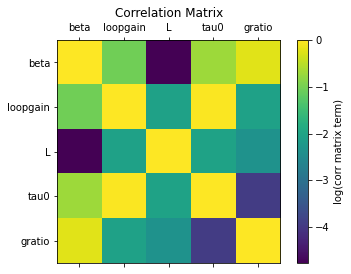

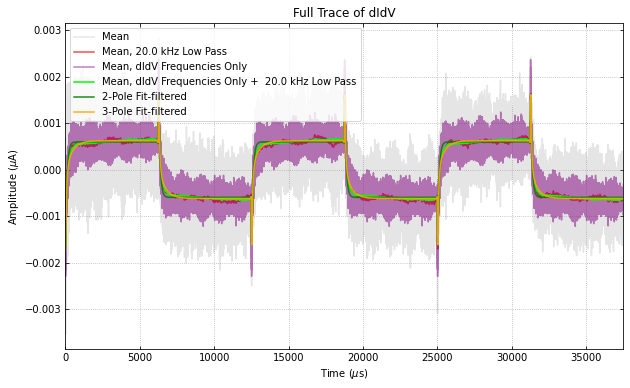

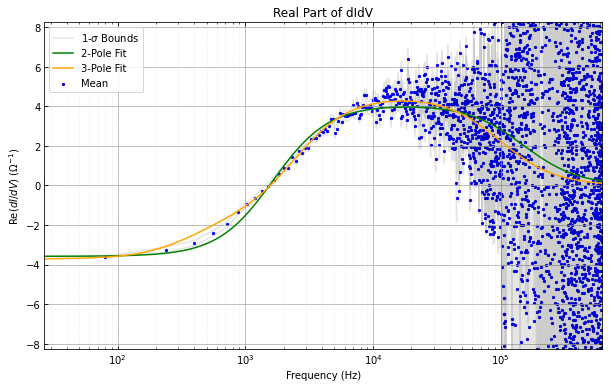

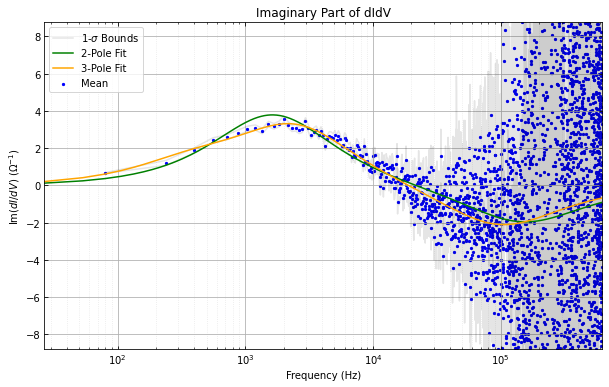



Melange4pc1ch TES bias 40.003 uA, R0 = 150.94 mOhms (% Rn = 44.30)

INFO: Fitting dIdV (2 and 3-poles)
INFO: Calculating small signal parameters for 2-poles model 
INFO: Calculating small signal parameters for 3-poles model 
INFO: Calculating dPdI (2 and 3-poles)

Results from 2-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.188

Fit time constants, NOT dIdV Poles: 
Tau1: 8.3e-05 s
Tau2: 1.56e-06 s
Tau3: 0 s

True dIdV Poles (from 2-poles fit): 
Tau_plus: 1.62e-06 s
Tau_minus: 9.36e-05 s
Tau_third: 0 s

Small Signal Parameters:
l (loop gain) = 9.460 +/- 0.6910
beta = 0.387 +/- 0.0292
gratio = -0.000 +/- 0.0000
tau0 = 0.702 +/- 0.05728 ms
L = 339.976 +/- 12.3283 nH

Results from 3-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.175

Fit time constants, NOT dIdV Poles: 
Tau1: 9.82e-05 s
Tau2: 2.23e-06 s
Tau3: 0.0002151 s

True dIdV Poles (from 3-poles fit): 
Tau_plus: 2.36e-06 s
Tau_minus: 5.74e-05 s
Tau_third: 0.0002917 s

Small Signal Paramete

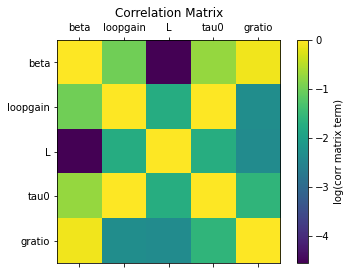

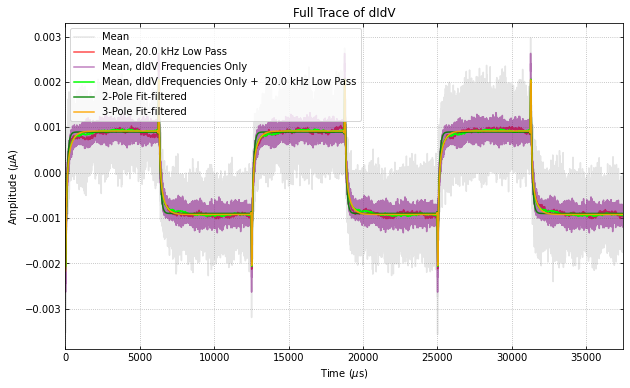

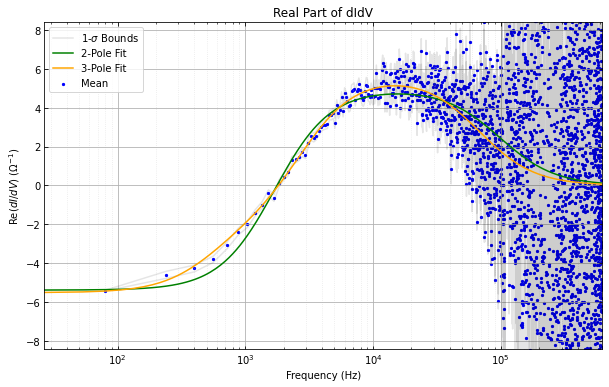

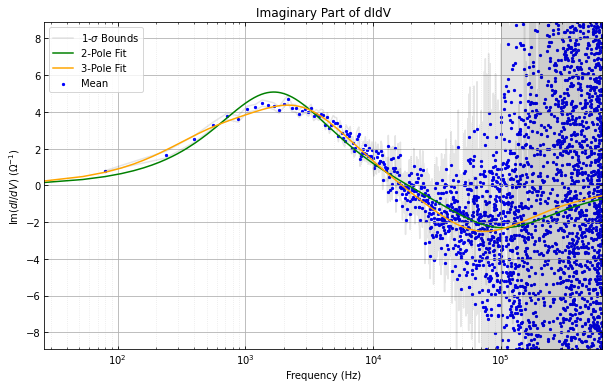



Melange4pc1ch TES bias 35.037 uA, R0 = 114.61 mOhms (% Rn = 33.60)

INFO: Fitting dIdV (2 and 3-poles)
INFO: Calculating small signal parameters for 2-poles model 
INFO: Calculating small signal parameters for 3-poles model 
INFO: Calculating dPdI (2 and 3-poles)

Results from 2-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.183

Fit time constants, NOT dIdV Poles: 
Tau1: 6.41e-05 s
Tau2: 2.07e-06 s
Tau3: 0 s

True dIdV Poles (from 2-poles fit): 
Tau_plus: 2.19e-06 s
Tau_minus: 8.69e-05 s
Tau_third: 0 s

Small Signal Parameters:
l (loop gain) = 15.744 +/- 1.9039
beta = 0.514 +/- 0.0320
gratio = -0.000 +/- 0.0000
tau0 = 0.945 +/- 0.1219 ms
L = 374.620 +/- 9.5509 nH

Results from 3-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.170

Fit time constants, NOT dIdV Poles: 
Tau1: 7.13e-05 s
Tau2: 2.62e-06 s
Tau3: 0.0002058 s

True dIdV Poles (from 3-poles fit): 
Tau_plus: 2.85e-06 s
Tau_minus: 5.73e-05 s
Tau_third: 0.000268 s

Small Signal Parameter

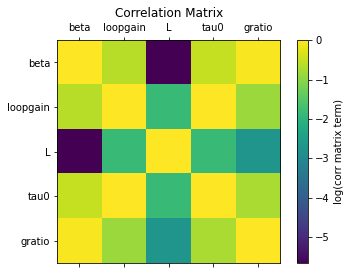

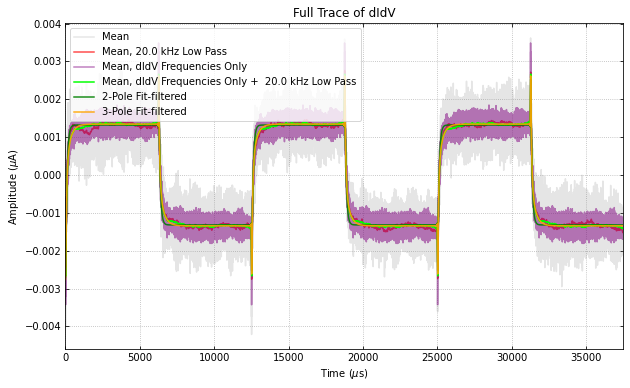

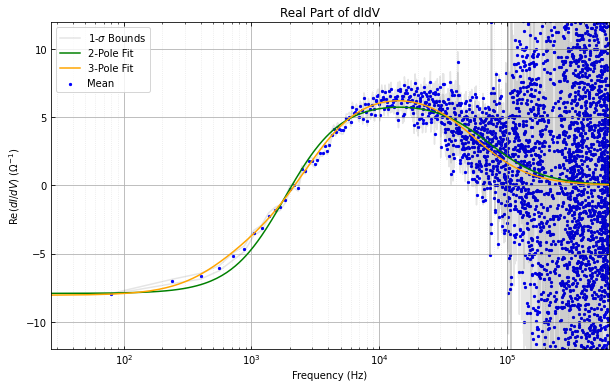

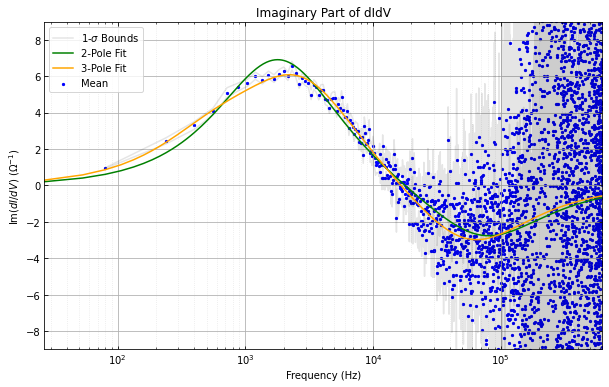



Melange4pc1ch TES bias 29.991 uA, R0 = 81.19 mOhms (% Rn = 23.80)

INFO: Fitting dIdV (2 and 3-poles)
INFO: Calculating small signal parameters for 2-poles model 
INFO: Calculating small signal parameters for 3-poles model 
INFO: Calculating dPdI (2 and 3-poles)

Results from 2-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.185

Fit time constants, NOT dIdV Poles: 
Tau1: 5.86e-05 s
Tau2: 2.92e-06 s
Tau3: 0 s

True dIdV Poles (from 2-poles fit): 
Tau_plus: 3.18e-06 s
Tau_minus: 9.12e-05 s
Tau_third: 0 s

Small Signal Parameters:
l (loop gain) = 21.561 +/- 3.4755
beta = 0.650 +/- 0.0351
gratio = -0.000 +/- 0.0000
tau0 = 1.21 +/- 0.2038 ms
L = 413.862 +/- 7.3954 nH

Results from 3-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.172

Fit time constants, NOT dIdV Poles: 
Tau1: 6.36e-05 s
Tau2: 3.48e-06 s
Tau3: 0.0001964 s

True dIdV Poles (from 3-poles fit): 
Tau_plus: 3.91e-06 s
Tau_minus: 6.1e-05 s
Tau_third: 0.0002545 s

Small Signal Parameters:

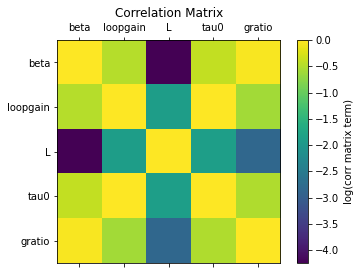

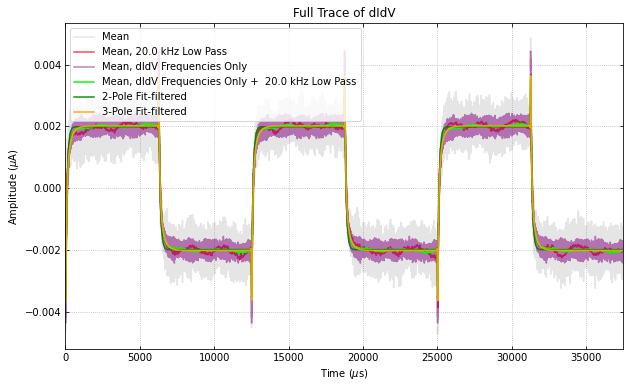

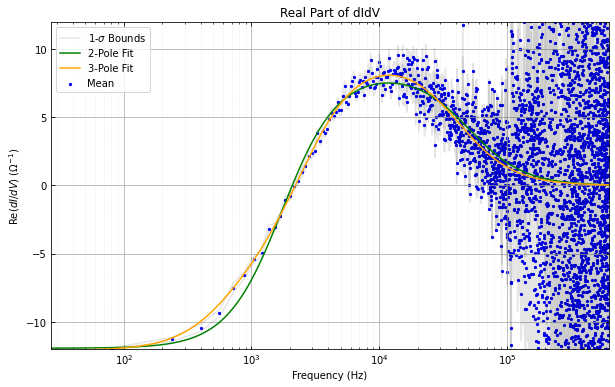

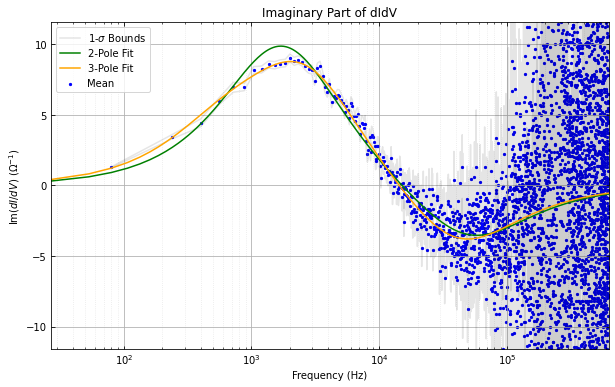



Melange4pc1ch TES bias 28.037 uA, R0 = 69.33 mOhms (% Rn = 20.30)

INFO: Fitting dIdV (2 and 3-poles)
INFO: Calculating small signal parameters for 2-poles model 
INFO: Calculating small signal parameters for 3-poles model 
INFO: Calculating dPdI (2 and 3-poles)

Results from 2-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.178

Fit time constants, NOT dIdV Poles: 
Tau1: 5.72e-05 s
Tau2: 3.41e-06 s
Tau3: 0 s

True dIdV Poles (from 2-poles fit): 
Tau_plus: 3.77e-06 s
Tau_minus: 9.22e-05 s
Tau_third: 0 s

Small Signal Parameters:
l (loop gain) = 23.665 +/- 4.1818
beta = 0.680 +/- 0.0360
gratio = -0.000 +/- 0.0000
tau0 = 1.3 +/- 0.2391 ms
L = 423.889 +/- 6.5459 nH

Results from 3-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.167

Fit time constants, NOT dIdV Poles: 
Tau1: 6.14e-05 s
Tau2: 4.01e-06 s
Tau3: 0.0001954 s

True dIdV Poles (from 3-poles fit): 
Tau_plus: 4.58e-06 s
Tau_minus: 6.29e-05 s
Tau_third: 0.0002507 s

Small Signal Parameters:

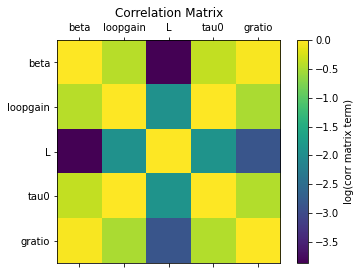

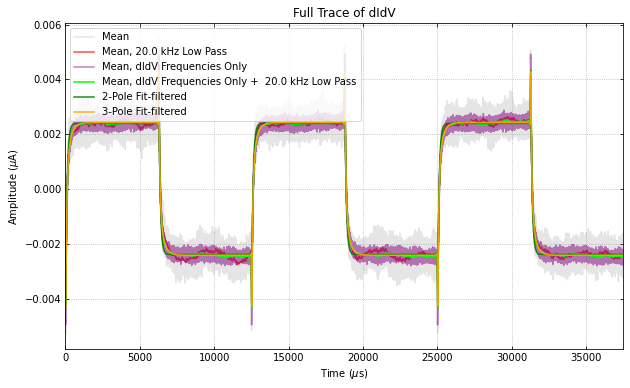

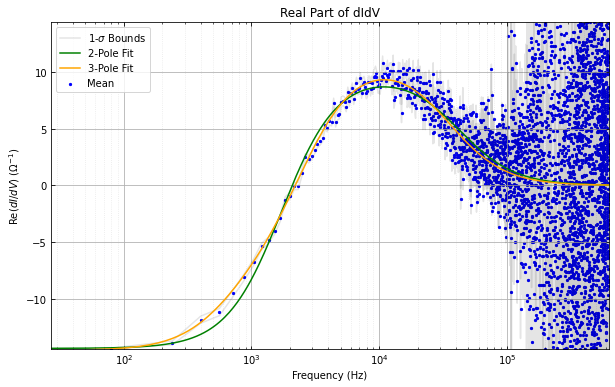

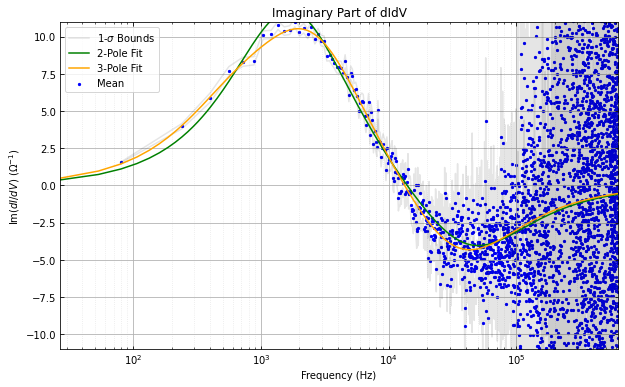



Melange4pc1ch TES bias 26.002 uA, R0 = 57.70 mOhms (% Rn = 16.90)

INFO: Fitting dIdV (2 and 3-poles)
INFO: Calculating small signal parameters for 2-poles model 
INFO: Calculating small signal parameters for 3-poles model 
INFO: Calculating dPdI (2 and 3-poles)

Results from 2-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.179

Fit time constants, NOT dIdV Poles: 
Tau1: 5.4e-05 s
Tau2: 3.78e-06 s
Tau3: 0 s

True dIdV Poles (from 2-poles fit): 
Tau_plus: 4.25e-06 s
Tau_minus: 9.61e-05 s
Tau_third: 0 s

Small Signal Parameters:
l (loop gain) = 27.845 +/- 5.6271
beta = 0.798 +/- 0.0390
gratio = -0.000 +/- 0.0000
tau0 = 1.45 +/- 0.3038 ms
L = 421.990 +/- 6.5227 nH

Results from 3-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.168

Fit time constants, NOT dIdV Poles: 
Tau1: 5.72e-05 s
Tau2: 4.36e-06 s
Tau3: 0.0002237 s

True dIdV Poles (from 3-poles fit): 
Tau_plus: 5.05e-06 s
Tau_minus: 6.79e-05 s
Tau_third: 0.0002802 s

Small Signal Parameters:

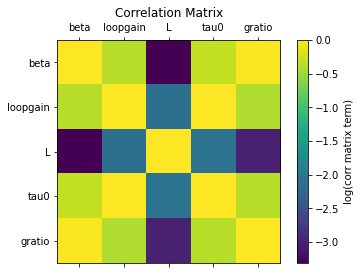

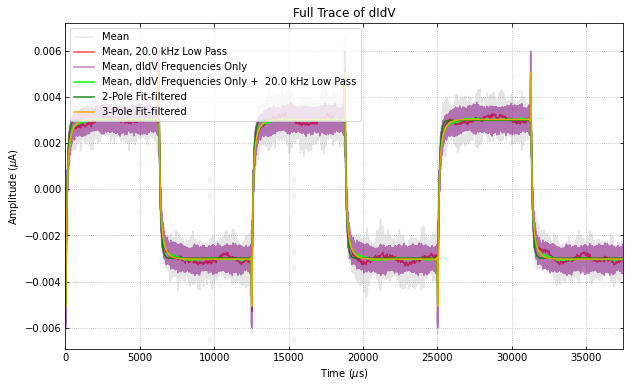

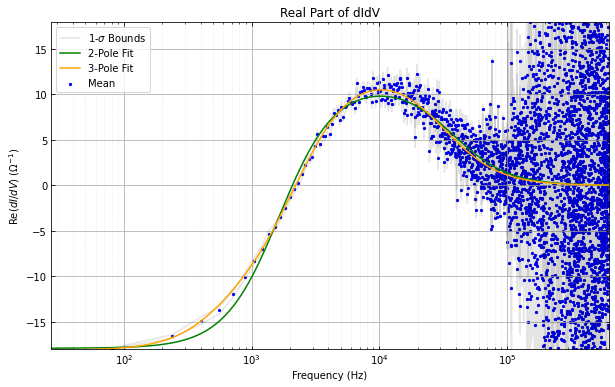

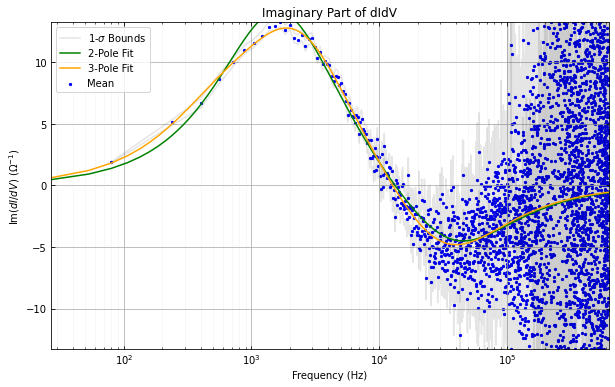



Melange4pc1ch TES bias 23.967 uA, R0 = 46.76 mOhms (% Rn = 13.70)

INFO: Fitting dIdV (2 and 3-poles)
INFO: Calculating small signal parameters for 2-poles model 
INFO: Calculating small signal parameters for 3-poles model 
INFO: Calculating dPdI (2 and 3-poles)

Results from 2-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.185

Fit time constants, NOT dIdV Poles: 
Tau1: 5.08e-05 s
Tau2: 4.39e-06 s
Tau3: 0 s

True dIdV Poles (from 2-poles fit): 
Tau_plus: 5.05e-06 s
Tau_minus: 9.93e-05 s
Tau_third: 0 s

Small Signal Parameters:
l (loop gain) = 30.012 +/- 6.3277
beta = 0.930 +/- 0.0422
gratio = -0.000 +/- 0.0000
tau0 = 1.47 +/- 0.3211 ms
L = 430.612 +/- 5.4956 nH

Results from 3-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.168

Fit time constants, NOT dIdV Poles: 
Tau1: 5.39e-05 s
Tau2: 5.2e-06 s
Tau3: 0.0002016 s

True dIdV Poles (from 3-poles fit): 
Tau_plus: 6.27e-06 s
Tau_minus: 6.47e-05 s
Tau_third: 0.0002642 s

Small Signal Parameters:

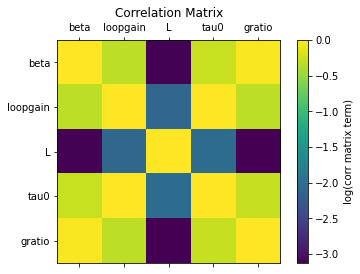

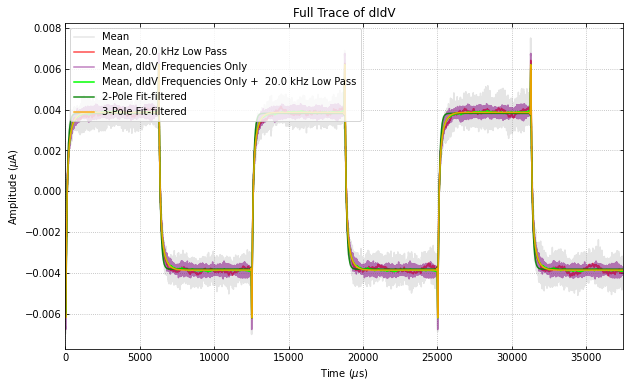

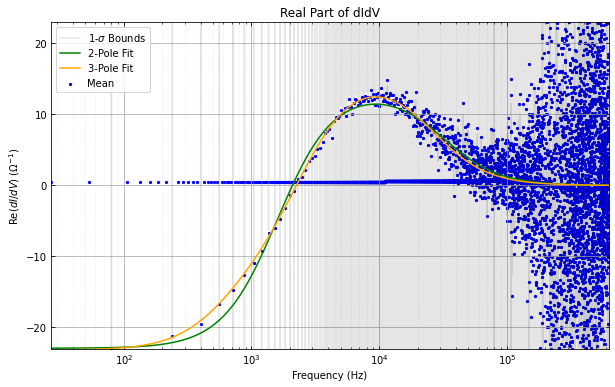

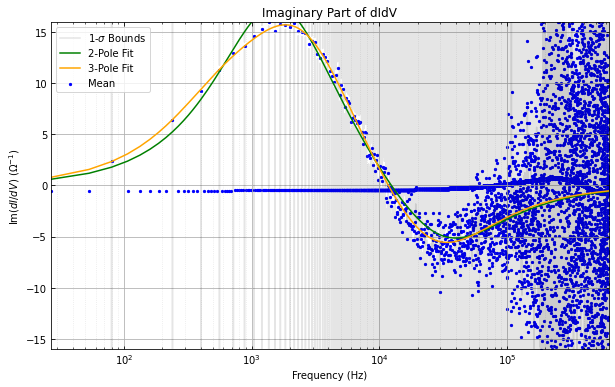



Melange4pc1ch TES bias 22.014 uA, R0 = 36.91 mOhms (% Rn = 10.80)

INFO: Fitting dIdV (2 and 3-poles)
INFO: Calculating small signal parameters for 2-poles model 
INFO: Calculating small signal parameters for 3-poles model 
INFO: Calculating dPdI (2 and 3-poles)

Results from 2-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.188

Fit time constants, NOT dIdV Poles: 
Tau1: 4.72e-05 s
Tau2: 5.14e-06 s
Tau3: 0 s

True dIdV Poles (from 2-poles fit): 
Tau_plus: 6.1e-06 s
Tau_minus: 0.000105 s
Tau_third: 0 s

Small Signal Parameters:
l (loop gain) = 34.567 +/- 8.0686
beta = 1.110 +/- 0.0468
gratio = -0.000 +/- 0.0000
tau0 = 1.59 +/- 0.381 ms
L = 440.887 +/- 4.6753 nH

Results from 3-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.165

Fit time constants, NOT dIdV Poles: 
Tau1: 4.95e-05 s
Tau2: 5.99e-06 s
Tau3: 0.0002311 s

True dIdV Poles (from 3-poles fit): 
Tau_plus: 7.5e-06 s
Tau_minus: 7.05e-05 s
Tau_third: 0.0002965 s

Small Signal Parameters:
l

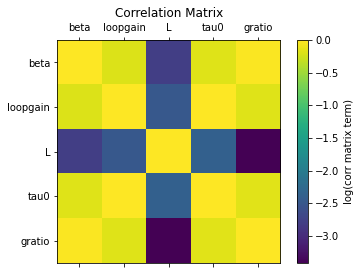

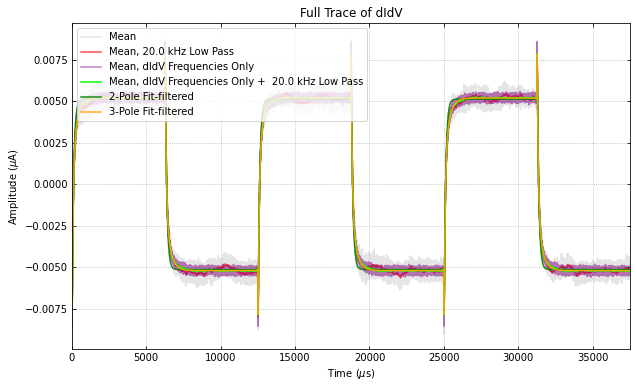

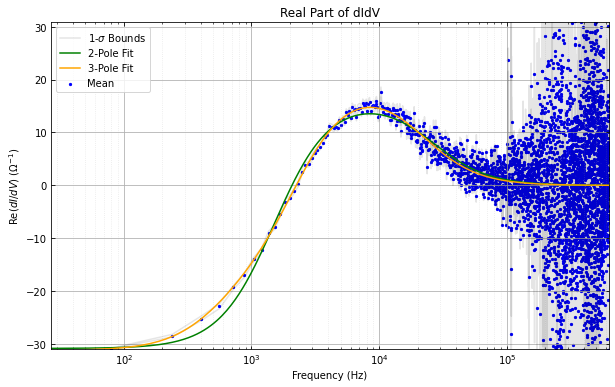

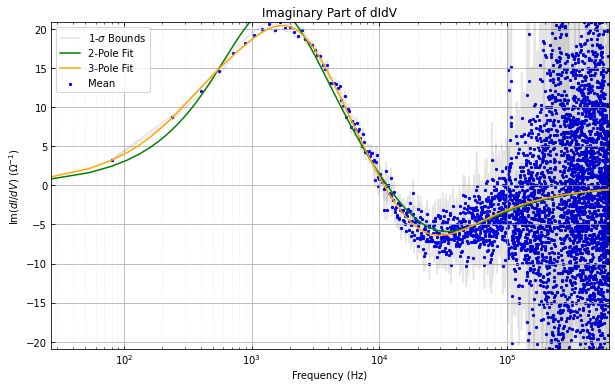



Melange4pc1ch TES bias 19.979 uA, R0 = 27.19 mOhms (% Rn = 8.00)

INFO: Fitting dIdV (2 and 3-poles)
INFO: Calculating small signal parameters for 2-poles model 
INFO: Calculating small signal parameters for 3-poles model 
INFO: Calculating dPdI (2 and 3-poles)

Results from 2-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.196

Fit time constants, NOT dIdV Poles: 
Tau1: 4.06e-05 s
Tau2: 5.91e-06 s
Tau3: 0 s

True dIdV Poles (from 2-poles fit): 
Tau_plus: 7.36e-06 s
Tau_minus: 0.000114 s
Tau_third: 0 s

Small Signal Parameters:
l (loop gain) = 44.771 +/- 12.5267
beta = 1.477 +/- 0.0568
gratio = -0.000 +/- 0.0000
tau0 = 1.78 +/- 0.5085 ms
L = 444.301 +/- 4.6373 nH

Results from 3-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.170

Fit time constants, NOT dIdV Poles: 
Tau1: 4.25e-05 s
Tau2: 7.09e-06 s
Tau3: 0.0002016 s

True dIdV Poles (from 3-poles fit): 
Tau_plus: 3.17e-06 s
Tau_minus: 7.82e-05 s
Tau_third: 0.0002725 s

Small Signal Parameters

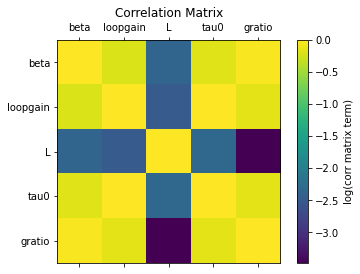

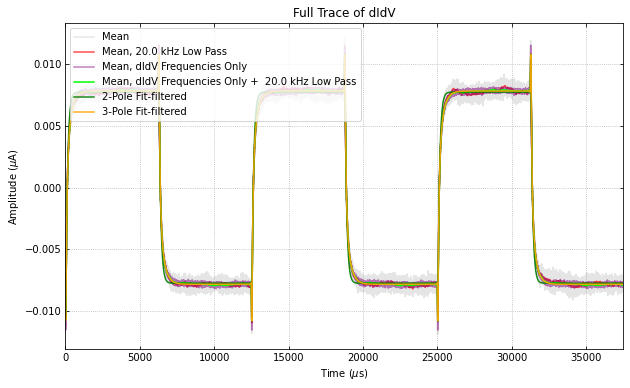

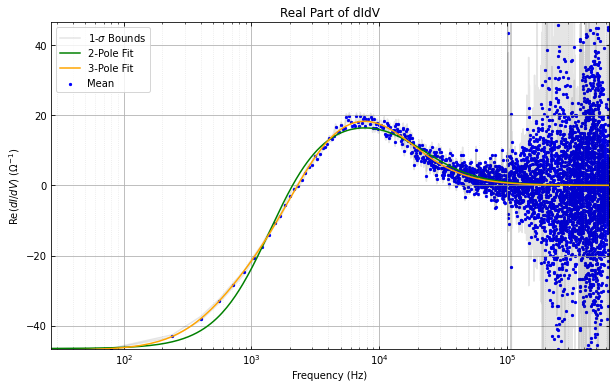

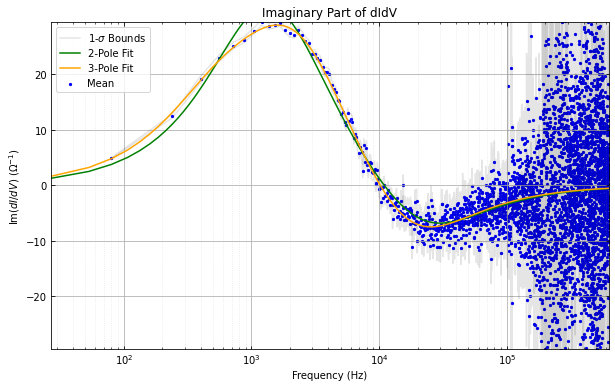

INFO: Saving filter/TES data to file /sdata1/runs/run28/filterdata/iv_didv_I2_D20230615_T231959/ivsweep_analysis_D20240726_T140354.hdf5! (overwrite=True)


In [13]:
ivanalysis.analyze_didv(lgc_plot=True)

#### Melange 1% dIdV analysis summary

Summary dIdV Analysis for Melange1pc1ch

TES Superconducting Measurements:

Rp from dIdV fit = 3.96 +/- 0.008 mOhms
Rp rom IV Sweep = 326.21 +/- 6.703 mOhms

TES Normal Measurements:

Rn from dIdV fit = 323.63 +/- 1.100 mOhms
Rn rom IV Sweep = 326.21 +/- 6.703 mOhms

Measurements TES in Transition 3-poles Fit:


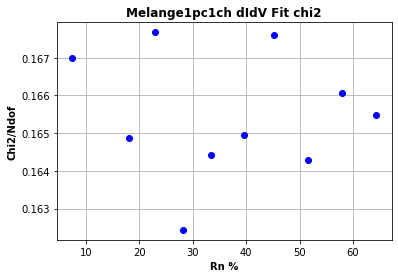


Small Signal Parameters


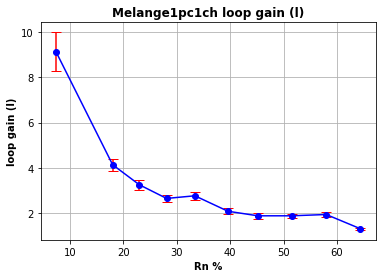

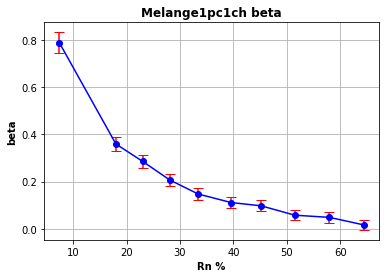

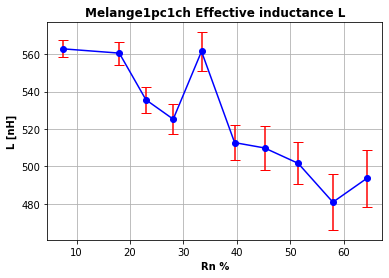

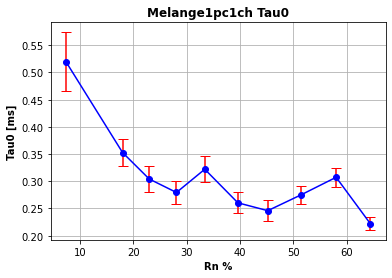

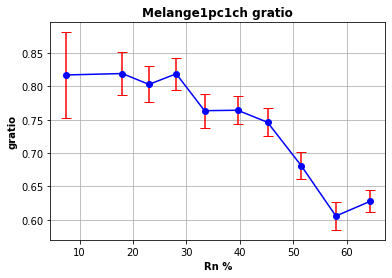


Fall Times


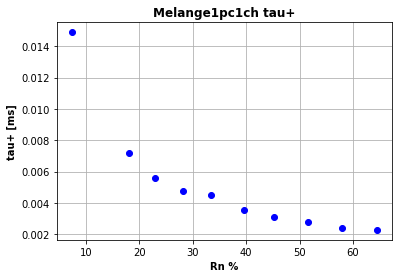

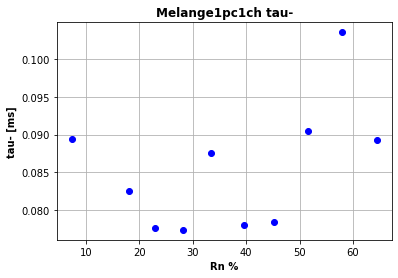

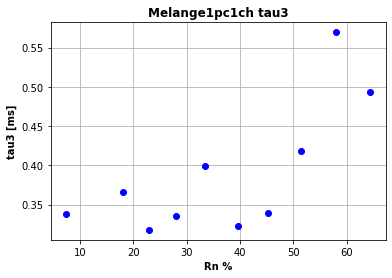

In [14]:
ivanalysis.plot_didv_summary('Melange1pc1ch')

#### Melange 4% dIdV analysis summary

Summary dIdV Analysis for Melange4pc1ch

TES Superconducting Measurements:

Rp from dIdV fit = 2.88 +/- 0.007 mOhms
Rp rom IV Sweep = 340.86 +/- 6.975 mOhms

TES Normal Measurements:

Rn from dIdV fit = 340.25 +/- 1.400 mOhms
Rn rom IV Sweep = 340.86 +/- 6.975 mOhms

Measurements TES in Transition 3-poles Fit:


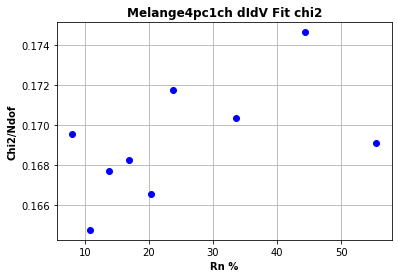


Small Signal Parameters


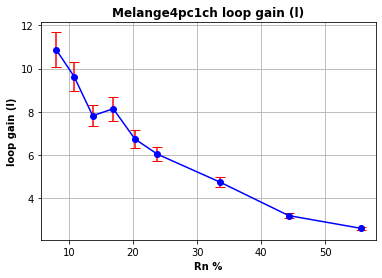

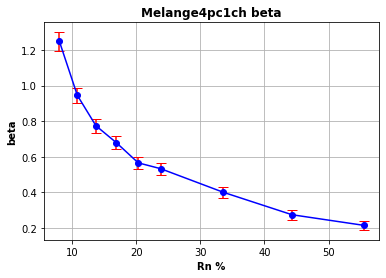

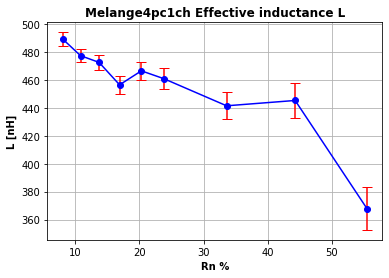

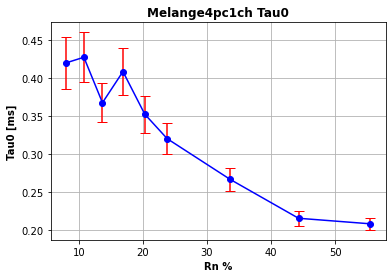

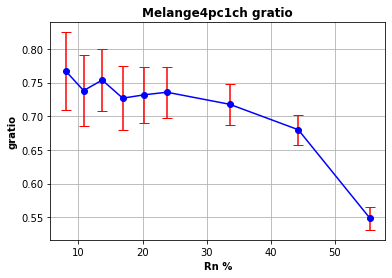


Fall Times


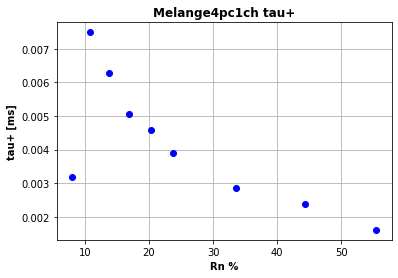

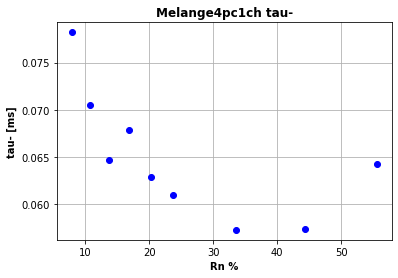

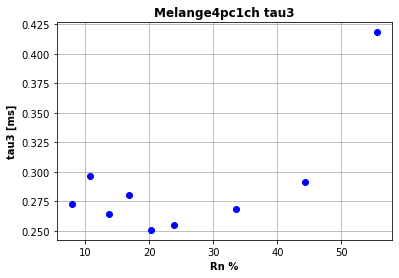

In [15]:
ivanalysis.plot_didv_summary('Melange4pc1ch')

### Melange 1%  Energy Resolution

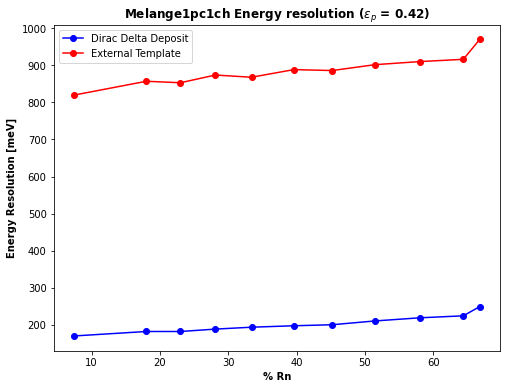

INFO: Saving filter/TES data to file /sdata1/runs/run28/filterdata/iv_didv_I2_D20230615_T231959/ivsweep_analysis_D20240726_T140354.hdf5! (overwrite=True)


In [16]:
# let's define a template based on the pulse data (sum of  3 two-pole pulses),
# see Roger Romani's detanalysis phonon calibration demo

# dataframe
ivdata = ivanalysis.get_ivsweep_data('Melange1pc1ch')

# functional form parameters for template (power template)
amplitudes = [1.67e-15, 1.32e-15, 2.39e-17]
fall_times = [44.6e-6, 147.5e-6, 3872.9e-6]
rise_times = [8.79e-6, 8.79e-6, 8.79e-6]

# time array
nb_bins = ivdata['psd'][0].shape[0]
fs = ivdata['fs_noise'][0]
time_array = np.asarray(range(nb_bins))/fs

# define template
template =  qp.utils.make_template_sum_twopoles(time_array, amplitudes, 
                                                rise_times, fall_times, normalize=True)

ivanalysis.calc_energy_resolution(channels='Melange1pc1ch', lgc_plot=True, template=template,
                                  collection_eff=0.42, lgc_power_template=True)

### Melange 4%  Energy Resolution

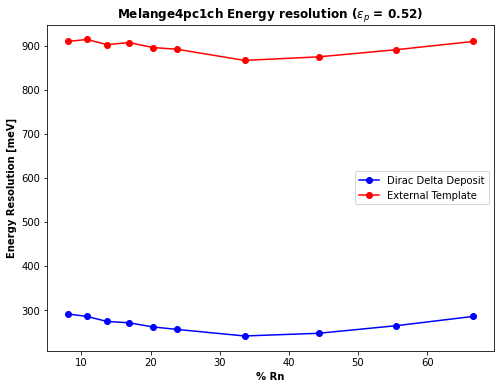

INFO: Saving filter/TES data to file /sdata1/runs/run28/filterdata/iv_didv_I2_D20230615_T231959/ivsweep_analysis_D20240726_T140354.hdf5! (overwrite=True)


In [17]:
# let's define a template based on the pulse data (sum of  3 two-pole pulses),
# see Roger Romani's detanalysis phonon calibration demo

# dataframe
ivdata = ivanalysis.get_ivsweep_data('Melange4pc1ch')

# functional form parameters for template  (power template)
amplitudes = [2.8e-15, 2.54e-15, 1.43e-16]
fall_times = [10.0e-6, 99.4e-6, 930.6e-6]
rise_times = [7.00e-6, 7.00e-6, 7.00e-6]

# time array
nb_bins = ivdata['psd'][0].shape[0]
fs = ivdata['fs_noise'][0]
time_array = np.asarray(range(nb_bins))/fs

# define template
template =  qp.utils.make_template_sum_twopoles(time_array, amplitudes, 
                                                rise_times, fall_times, normalize=True)


ivanalysis.calc_energy_resolution(channels='Melange4pc1ch', lgc_plot=True, template=template,
                                  collection_eff=0.52, lgc_power_template=True)